In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import vtk 
from vtk.util import numpy_support as VN
import matplotlib.tri as tri

2023-10-09 17:08:42.974008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 17:08:44.018859: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
path = ["./CNN Data/M1/150_Z_0.03125", 
        "./CNN Data/M1/151_Z_0.03125",
        "./CNN Data/M1/152_Z_0.03125",
        "./CNN Data/M1/153_Z_0.03125",
        "./CNN Data/M1/154_Z_0.03125",
        "./CNN Data/M1/155_Z_0.03125",
        "./CNN Data/M1/156_Z_0.03125",
        "./CNN Data/M1/157_Z_0.03125",
        "./CNN Data/M1/158_Z_0.03125",
        "./CNN Data/M1/159_Z_0.03125",
        "./CNN Data/M1/160_Z_0.03125",
        "./CNN Data/M1/150_Z_N0.03125",
        "./CNN Data/M1/151_Z_N0.03125",
        "./CNN Data/M1/152_Z_N0.03125",
        "./CNN Data/M1/153_Z_N0.03125",
        "./CNN Data/M1/154_Z_N0.03125",
        "./CNN Data/M1/155_Z_N0.03125",
        "./CNN Data/M1/156_Z_N0.03125",
        "./CNN Data/M1/157_Z_N0.03125",
        "./CNN Data/M1/158_Z_N0.03125",
        "./CNN Data/M1/159_Z_N0.03125",
        "./CNN Data/M1/160_Z_N0.03125",
        "./CNN Data/M1/161_Z_N0.03125",
        "./CNN Data/M1/162_Z_N0.03125",
        "./CNN Data/M1/163_Z_N0.03125",
        "./CNN Data/M1/164_Z_N0.03125",
        "./CNN Data/M1/165_Z_N0.03125",
        "./CNN Data/M1/166_Z_N0.03125",
        "./CNN Data/M1/167_Z_N0.03125",
        "./CNN Data/M1/168_Z_N0.03125",
        "./CNN Data/M1/169_Z_N0.03125",
        "./CNN Data/M1/170_Z_N0.03125",
        "./CNN Data/M1/150_Z_0.09375",
        "./CNN Data/M1/151_Z_0.09375",
        "./CNN Data/M1/152_Z_0.09375",
        "./CNN Data/M1/153_Z_0.09375",
        "./CNN Data/M1/154_Z_0.09375",
        "./CNN Data/M1/155_Z_0.09375",
        "./CNN Data/M1/156_Z_0.09375",
        "./CNN Data/M1/157_Z_0.09375",
        "./CNN Data/M1/158_Z_0.09375",
        "./CNN Data/M1/159_Z_0.09375",
        "./CNN Data/M1/160_Z_0.09375",
        "./CNN Data/M1/161_Z_0.09375",
        "./CNN Data/M1/162_Z_0.09375",
        "./CNN Data/M1/163_Z_0.09375",
        "./CNN Data/M1/164_Z_0.09375",
        "./CNN Data/M1/165_Z_0.09375",
        "./CNN Data/M1/166_Z_0.09375",
        "./CNN Data/M1/167_Z_0.09375",
        "./CNN Data/M1/168_Z_0.09375",
        "./CNN Data/M1/169_Z_0.09375",
        "./CNN Data/M1/170_Z_0.09375",
        "./CNN Data/M1/150_Z_N0.09375",
        "./CNN Data/M1/151_Z_N0.09375",
        "./CNN Data/M1/152_Z_N0.09375",
        "./CNN Data/M1/153_Z_N0.09375",
        "./CNN Data/M1/154_Z_N0.09375",
        "./CNN Data/M1/155_Z_N0.09375",
        "./CNN Data/M1/156_Z_N0.09375",
        "./CNN Data/M1/157_Z_N0.09375",
        "./CNN Data/M1/158_Z_N0.09375",
        "./CNN Data/M1/159_Z_N0.09375",
        "./CNN Data/M1/160_Z_N0.09375",
        "./CNN Data/M1/161_Z_N0.09375",
        "./CNN Data/M1/162_Z_N0.09375",
        "./CNN Data/M1/163_Z_N0.09375",
        "./CNN Data/M1/164_Z_N0.09375",
        "./CNN Data/M1/165_Z_N0.09375",
        "./CNN Data/M1/166_Z_N0.09375",
        "./CNN Data/M1/167_Z_N0.09375",
        "./CNN Data/M1/168_Z_N0.09375",
        "./CNN Data/M1/169_Z_N0.09375",
        "./CNN Data/M1/170_Z_N0.09375",
        "./CNN Data/M1/150_Z_0.15625",
        "./CNN Data/M1/151_Z_0.15625",
        "./CNN Data/M1/152_Z_0.15625",
        "./CNN Data/M1/153_Z_0.15625",
        "./CNN Data/M1/154_Z_0.15625",
        "./CNN Data/M1/155_Z_0.15625",
        "./CNN Data/M1/156_Z_0.15625",
        "./CNN Data/M1/157_Z_0.15625",
        "./CNN Data/M1/158_Z_0.15625",
        "./CNN Data/M1/159_Z_0.15625",
        "./CNN Data/M1/160_Z_0.15625",
        "./CNN Data/M1/161_Z_0.15625",
        "./CNN Data/M1/162_Z_0.15625",
        "./CNN Data/M1/163_Z_0.15625",
        "./CNN Data/M1/164_Z_0.15625",
        "./CNN Data/M1/165_Z_0.15625",
        "./CNN Data/M1/166_Z_0.15625",
        "./CNN Data/M1/167_Z_0.15625",
        "./CNN Data/M1/168_Z_0.15625",
        "./CNN Data/M1/169_Z_0.15625",
        "./CNN Data/M1/170_Z_0.15625",
        "./CNN Data/M1/150_Z_N0.15625",
        "./CNN Data/M1/151_Z_N0.15625",
        "./CNN Data/M1/152_Z_N0.15625",
        "./CNN Data/M1/153_Z_N0.15625",
        "./CNN Data/M1/154_Z_N0.15625",
        "./CNN Data/M1/155_Z_N0.15625",
        "./CNN Data/M1/156_Z_N0.15625",
        "./CNN Data/M1/157_Z_N0.15625",
        "./CNN Data/M1/158_Z_N0.15625",
        "./CNN Data/M1/159_Z_N0.15625",
        "./CNN Data/M1/160_Z_N0.15625",
        "./CNN Data/M1/161_Z_N0.15625",
        "./CNN Data/M1/162_Z_N0.15625",
        "./CNN Data/M1/163_Z_N0.15625",
        "./CNN Data/M1/164_Z_N0.15625",
        "./CNN Data/M1/165_Z_N0.15625",
        "./CNN Data/M1/166_Z_N0.15625",
        "./CNN Data/M1/167_Z_N0.15625",
        "./CNN Data/M1/168_Z_N0.15625",
        "./CNN Data/M1/169_Z_N0.15625",
        "./CNN Data/M1/170_Z_N0.15625"]

nt = len(path)
nx = 256
ny = 128
nc = 10
nf = 9
nl = 1

In [4]:
nt

116

In [6]:
data = np.zeros([nt, nx, ny, nc])

for t in range(nt):
    with open(path[t], "r") as f:
        f.readline()
        for j in range(ny):
            l = f.readline().split('\t')
            for i in range(nx):
                for c in range(nc):
                    data[t, i, j, c] = l[i*nc+c]

In [8]:
np.random.shuffle(data)

In [9]:
feats = np.zeros([nt, nx, ny, nf])
label = np.zeros([nt, nx, ny, nl])

for t in range(nt):
    for j in range(ny):
        for i in range(nx):
            for c in range(nc):
                if c<(nc-1):
                    feats[t, i, j, c] = data[t, i, j, c]
                else:
                    label[t, i, j, 0] = data[t, i, j,-1]   

In [11]:
split = int(0.8 * nt)
x_train = feats[0:split,:,:,:]
y_train = label[0:split,:,:,:]

x_val = feats[split+1:,:,:,:]
y_val = label[split+1:,:,:,:]

In [14]:
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [17]:
def Model(Nn, Nx, Ny, Nf, Nl, Nly):
    de = [1, 2, 4, 8, 16]
    model = tf.keras.models.Sequential()
    input_layer = tf.keras.layers.Input(shape=(nx, ny, nf))
    x = tf.keras.layers.Conv2D(int(Nn/de[0]), (3,3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly):
        x = tf.keras.layers.Conv2D(int(Nn/de[i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range(1, Nly+1):
        x = tf.keras.layers.Conv2D(int(Nn/de[Nly-i]), (3,3), activation='relu', padding='same')(x)
        x = tf.keras.layers.UpSampling2D((2,2))(x)
    output_layer = tf.keras.layers.Conv2D(nl, (3,3), activation='linear', padding='same')(x)
    
    model = tf.keras.models.Model(input_layer, output_layer)
    adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, 
                                           beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=[coeff_determination])
    model._name = f'model_n_{Nn}_lay_{Nly}'
    
    return model

In [18]:
neurons = [32, 64, 128, 256]
layers = [2, 3, 4, 5]
checkpoints = tf.keras.callbacks.ModelCheckpoint(filepath='CNN_checkpoints/test_UUp_weight-{epoch:02d}.h5', 
                                                  monitor='val_loss', 
                                                  verbose=1, 
                                                  save_best_only=True, 
                                                  mode='min')
#model.summary()
repof = './CNN_UUps_repo.txt'
with open(repof, 'w') as f:
    f.write('layer\t neuron\t train_cod\t val_cod\n')
    for layer in layers:
        for neuron in neurons:
            model = Model(neuron, nx, ny, nf, nl, layer)
            history_callback = model.fit(x_train, y_train, epochs=500, batch_size=16, 
                                    validation_data=[x_val, y_val], validation_batch_size=4, 
                                    callbacks=[checkpoints])
            indx = np.argmin(history_callback.history['val_loss'])
            info = [history_callback.history['coeff_determination'][indx], 
                    history_callback.history['val_coeff_determination'][indx]]
            f.write(f'{layer}\t{neuron}\t{info[0]}\t{info[1]}\n')
    f.close()

Epoch 1/500


2023-10-09 17:10:04.384164: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-10-09 17:10:04.805264: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-09 17:10:04.806162: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-09 17:10:04.806294: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:109] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2023-10-09 17:10:04.806992: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-09 17:10:04.807133: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:317] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This mes

6/6 [==============================] - ETA: 0s - loss: 0.0111 - coeff_determination: -0.0318 
Epoch 1: val_loss improved from inf to 0.01538, saving model to CNN_checkpoints/test_UUp_weight-01.h5
6/6 [==============================] - 5s 166ms/step - loss: 0.0111 - coeff_determination: -0.0318 - val_loss: 0.0154 - val_coeff_determination: 8.2220e-04
Epoch 2/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.0012
Epoch 2: val_loss improved from 0.01538 to 0.01533, saving model to CNN_checkpoints/test_UUp_weight-02.h5
6/6 [==============================] - 0s 33ms/step - loss: 0.0108 - coeff_determination: 0.0010 - val_loss: 0.0153 - val_coeff_determination: 0.0044
Epoch 3/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0118 - coeff_determination: 0.0048
Epoch 3: val_loss improved from 0.01533 to 0.01530, saving model to CNN_checkpoints/test_UUp_weight-03.h5
6/6 [==============================] - 0s 32ms/step - loss: 0.0107 - coeff_det

1/6 [====>.........................] - ETA: 0s - loss: 0.0091 - coeff_determination: 0.0317
Epoch 25: val_loss improved from 0.01491 to 0.01478, saving model to CNN_checkpoints/test_UUp_weight-25.h5
6/6 [==============================] - 0s 36ms/step - loss: 0.0104 - coeff_determination: 0.0343 - val_loss: 0.0148 - val_coeff_determination: 0.0392
Epoch 26/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0112 - coeff_determination: 0.0384
Epoch 26: val_loss did not improve from 0.01478
6/6 [==============================] - 0s 16ms/step - loss: 0.0103 - coeff_determination: 0.0399 - val_loss: 0.0149 - val_coeff_determination: 0.0297
Epoch 27/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0101 - coeff_determination: 0.0258
Epoch 27: val_loss did not improve from 0.01478
6/6 [==============================] - 0s 16ms/step - loss: 0.0105 - coeff_determination: 0.0236 - val_loss: 0.0151 - val_coeff_determination: 0.0192
Epoch 28/500
1/6 [====>......................

Epoch 50/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0107 - coeff_determination: 0.1137
Epoch 50: val_loss did not improve from 0.01381
6/6 [==============================] - 0s 16ms/step - loss: 0.0095 - coeff_determination: 0.1214 - val_loss: 0.0140 - val_coeff_determination: 0.0932
Epoch 51/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0132 - coeff_determination: 0.0927
Epoch 51: val_loss improved from 0.01381 to 0.01369, saving model to CNN_checkpoints/test_UUp_weight-51.h5
6/6 [==============================] - 0s 30ms/step - loss: 0.0094 - coeff_determination: 0.1263 - val_loss: 0.0137 - val_coeff_determination: 0.1134
Epoch 52/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0076 - coeff_determination: 0.1429
Epoch 52: val_loss improved from 0.01369 to 0.01347, saving model to CNN_checkpoints/test_UUp_weight-52.h5
6/6 [==============================] - 0s 31ms/step - loss: 0.0093 - coeff_determination: 0.1347 - val_loss: 0.0135 - val_c

Epoch 101/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0079 - coeff_determination: 0.3709
Epoch 101: val_loss did not improve from 0.00936
6/6 [==============================] - 0s 16ms/step - loss: 0.0070 - coeff_determination: 0.3632 - val_loss: 0.0108 - val_coeff_determination: 0.3076
Epoch 102/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0106 - coeff_determination: 0.2964
Epoch 102: val_loss did not improve from 0.00936
6/6 [==============================] - 0s 18ms/step - loss: 0.0068 - coeff_determination: 0.3743 - val_loss: 0.0095 - val_coeff_determination: 0.3931
Epoch 103/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0084 - coeff_determination: 0.3758
Epoch 103: val_loss improved from 0.00936 to 0.00935, saving model to CNN_checkpoints/test_UUp_weight-103.h5
6/6 [==============================] - 0s 26ms/step - loss: 0.0064 - coeff_determination: 0.4022 - val_loss: 0.0093 - val_coeff_determination: 0.4006
Epoch 104/500
1/6 [====>.

1/6 [====>.........................] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.5347
Epoch 153: val_loss did not improve from 0.00745
6/6 [==============================] - 0s 16ms/step - loss: 0.0051 - coeff_determination: 0.5242 - val_loss: 0.0091 - val_coeff_determination: 0.4166
Epoch 154/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0086 - coeff_determination: 0.3931
Epoch 154: val_loss did not improve from 0.00745
6/6 [==============================] - 0s 16ms/step - loss: 0.0059 - coeff_determination: 0.4608 - val_loss: 0.0089 - val_coeff_determination: 0.4319
Epoch 155/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0049 - coeff_determination: 0.4859
Epoch 155: val_loss did not improve from 0.00745
6/6 [==============================] - 0s 16ms/step - loss: 0.0057 - coeff_determination: 0.4676 - val_loss: 0.0085 - val_coeff_determination: 0.4567
Epoch 156/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0055 - coeff_determination: 

Epoch 205/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0045 - coeff_determination: 0.5515
Epoch 205: val_loss did not improve from 0.00635
6/6 [==============================] - 0s 16ms/step - loss: 0.0047 - coeff_determination: 0.5667 - val_loss: 0.0065 - val_coeff_determination: 0.5881
Epoch 206/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.5475
Epoch 206: val_loss did not improve from 0.00635
6/6 [==============================] - 0s 16ms/step - loss: 0.0045 - coeff_determination: 0.5804 - val_loss: 0.0064 - val_coeff_determination: 0.5948
Epoch 207/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0050 - coeff_determination: 0.5728
Epoch 207: val_loss did not improve from 0.00635
6/6 [==============================] - 0s 16ms/step - loss: 0.0044 - coeff_determination: 0.5906 - val_loss: 0.0067 - val_coeff_determination: 0.5769
Epoch 208/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0055 - coeff_d

1/6 [====>.........................] - ETA: 0s - loss: 0.0043 - coeff_determination: 0.5603
Epoch 257: val_loss did not improve from 0.00528
6/6 [==============================] - 0s 16ms/step - loss: 0.0046 - coeff_determination: 0.5762 - val_loss: 0.0055 - val_coeff_determination: 0.6543
Epoch 258/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0045 - coeff_determination: 0.5995
Epoch 258: val_loss did not improve from 0.00528
6/6 [==============================] - 0s 16ms/step - loss: 0.0042 - coeff_determination: 0.6197 - val_loss: 0.0054 - val_coeff_determination: 0.6565
Epoch 259/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.6482
Epoch 259: val_loss did not improve from 0.00528
6/6 [==============================] - 0s 16ms/step - loss: 0.0041 - coeff_determination: 0.6174 - val_loss: 0.0067 - val_coeff_determination: 0.5726
Epoch 260/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0037 - coeff_determination: 

Epoch 310/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.6292
Epoch 310: val_loss did not improve from 0.00481
6/6 [==============================] - 0s 16ms/step - loss: 0.0042 - coeff_determination: 0.6086 - val_loss: 0.0063 - val_coeff_determination: 0.5972
Epoch 311/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.5957
Epoch 311: val_loss did not improve from 0.00481
6/6 [==============================] - 0s 16ms/step - loss: 0.0042 - coeff_determination: 0.6114 - val_loss: 0.0059 - val_coeff_determination: 0.6234
Epoch 312/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6558
Epoch 312: val_loss did not improve from 0.00481
6/6 [==============================] - 0s 16ms/step - loss: 0.0043 - coeff_determination: 0.5942 - val_loss: 0.0055 - val_coeff_determination: 0.6543
Epoch 313/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0041 - coeff_d

6/6 [==============================] - 0s 16ms/step - loss: 0.0037 - coeff_determination: 0.6571 - val_loss: 0.0047 - val_coeff_determination: 0.7000
Epoch 337/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6445
Epoch 337: val_loss did not improve from 0.00443
6/6 [==============================] - 0s 16ms/step - loss: 0.0034 - coeff_determination: 0.6853 - val_loss: 0.0047 - val_coeff_determination: 0.7014
Epoch 338/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7272
Epoch 338: val_loss improved from 0.00443 to 0.00441, saving model to CNN_checkpoints/test_UUp_weight-338.h5
6/6 [==============================] - 0s 29ms/step - loss: 0.0034 - coeff_determination: 0.6811 - val_loss: 0.0044 - val_coeff_determination: 0.7207
Epoch 339/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6314
Epoch 339: val_loss improved from 0.00441 to 0.00433, saving model to CNN_

Epoch 363/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0044 - coeff_determination: 0.6547
Epoch 363: val_loss did not improve from 0.00409
6/6 [==============================] - 0s 16ms/step - loss: 0.0037 - coeff_determination: 0.6513 - val_loss: 0.0052 - val_coeff_determination: 0.6707
Epoch 364/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6820
Epoch 364: val_loss did not improve from 0.00409
6/6 [==============================] - 0s 16ms/step - loss: 0.0036 - coeff_determination: 0.6674 - val_loss: 0.0045 - val_coeff_determination: 0.7136
Epoch 365/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6936
Epoch 365: val_loss did not improve from 0.00409
6/6 [==============================] - 0s 16ms/step - loss: 0.0034 - coeff_determination: 0.6855 - val_loss: 0.0045 - val_coeff_determination: 0.7163
Epoch 366/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0026 - coeff_d

Epoch 390/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0043 - coeff_determination: 0.6893
Epoch 390: val_loss did not improve from 0.00409
6/6 [==============================] - 0s 16ms/step - loss: 0.0032 - coeff_determination: 0.7028 - val_loss: 0.0047 - val_coeff_determination: 0.7006
Epoch 391/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7412
Epoch 391: val_loss did not improve from 0.00409
6/6 [==============================] - 0s 16ms/step - loss: 0.0032 - coeff_determination: 0.7046 - val_loss: 0.0041 - val_coeff_determination: 0.7377
Epoch 392/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.6905
Epoch 392: val_loss did not improve from 0.00409
6/6 [==============================] - 0s 16ms/step - loss: 0.0033 - coeff_determination: 0.6966 - val_loss: 0.0041 - val_coeff_determination: 0.7390
Epoch 393/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0044 - coeff_d

6/6 [==============================] - 0s 16ms/step - loss: 0.0032 - coeff_determination: 0.7028 - val_loss: 0.0042 - val_coeff_determination: 0.7354
Epoch 417/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.6929
Epoch 417: val_loss did not improve from 0.00385
6/6 [==============================] - 0s 16ms/step - loss: 0.0031 - coeff_determination: 0.7103 - val_loss: 0.0041 - val_coeff_determination: 0.7415
Epoch 418/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.7066
Epoch 418: val_loss did not improve from 0.00385
6/6 [==============================] - 0s 16ms/step - loss: 0.0030 - coeff_determination: 0.7271 - val_loss: 0.0040 - val_coeff_determination: 0.7444
Epoch 419/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7346
Epoch 419: val_loss did not improve from 0.00385
6/6 [==============================] - 0s 16ms/step - loss: 0.0029 - coeff_determinat

6/6 [==============================] - 0s 16ms/step - loss: 0.0031 - coeff_determination: 0.7127 - val_loss: 0.0046 - val_coeff_determination: 0.7067
Epoch 444/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0043 - coeff_determination: 0.6837
Epoch 444: val_loss did not improve from 0.00385
6/6 [==============================] - 0s 17ms/step - loss: 0.0031 - coeff_determination: 0.7120 - val_loss: 0.0041 - val_coeff_determination: 0.7400
Epoch 445/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7097
Epoch 445: val_loss did not improve from 0.00385
6/6 [==============================] - 0s 16ms/step - loss: 0.0032 - coeff_determination: 0.7000 - val_loss: 0.0050 - val_coeff_determination: 0.6798
Epoch 446/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6652
Epoch 446: val_loss did not improve from 0.00385
6/6 [==============================] - 0s 16ms/step - loss: 0.0035 - coeff_determinat

Epoch 470/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6896
Epoch 470: val_loss did not improve from 0.00365
6/6 [==============================] - 0s 16ms/step - loss: 0.0030 - coeff_determination: 0.7218 - val_loss: 0.0039 - val_coeff_determination: 0.7487
Epoch 471/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.7522
Epoch 471: val_loss improved from 0.00365 to 0.00352, saving model to CNN_checkpoints/test_UUp_weight-471.h5
6/6 [==============================] - 0s 30ms/step - loss: 0.0029 - coeff_determination: 0.7269 - val_loss: 0.0035 - val_coeff_determination: 0.7729
Epoch 472/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.7360
Epoch 472: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 16ms/step - loss: 0.0031 - coeff_determination: 0.7077 - val_loss: 0.0047 - val_coeff_determination: 0.7073
Epoch 473/500
1/6 [====>.

Epoch 497/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7407
Epoch 497: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 16ms/step - loss: 0.0028 - coeff_determination: 0.7424 - val_loss: 0.0037 - val_coeff_determination: 0.7685
Epoch 498/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7334
Epoch 498: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 16ms/step - loss: 0.0030 - coeff_determination: 0.7182 - val_loss: 0.0055 - val_coeff_determination: 0.6555
Epoch 499/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0046 - coeff_determination: 0.6494
Epoch 499: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 16ms/step - loss: 0.0031 - coeff_determination: 0.7107 - val_loss: 0.0040 - val_coeff_determination: 0.7458
Epoch 500/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0027 - coeff_d

6/6 [==============================] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.0329
Epoch 24: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 20ms/step - loss: 0.0104 - coeff_determination: 0.0329 - val_loss: 0.0149 - val_coeff_determination: 0.0323
Epoch 25/500
6/6 [==============================] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.0335
Epoch 25: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0104 - coeff_determination: 0.0335 - val_loss: 0.0149 - val_coeff_determination: 0.0344
Epoch 26/500
6/6 [==============================] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.0329
Epoch 26: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0104 - coeff_determination: 0.0329 - val_loss: 0.0150 - val_coeff_determination: 0.0264
Epoch 27/500
6/6 [==============================] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.0322

6/6 [==============================] - ETA: 0s - loss: 0.0066 - coeff_determination: 0.3979
Epoch 78: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0066 - coeff_determination: 0.3979 - val_loss: 0.0101 - val_coeff_determination: 0.3554
Epoch 79/500
6/6 [==============================] - ETA: 0s - loss: 0.0065 - coeff_determination: 0.4031
Epoch 79: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0065 - coeff_determination: 0.4031 - val_loss: 0.0102 - val_coeff_determination: 0.3470
Epoch 80/500
6/6 [==============================] - ETA: 0s - loss: 0.0074 - coeff_determination: 0.3083
Epoch 80: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0074 - coeff_determination: 0.3083 - val_loss: 0.0113 - val_coeff_determination: 0.2747
Epoch 81/500
6/6 [==============================] - ETA: 0s - loss: 0.0069 - coeff_determination: 0.3547

Epoch 132/500
6/6 [==============================] - ETA: 0s - loss: 0.0054 - coeff_determination: 0.5018
Epoch 132: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0054 - coeff_determination: 0.5018 - val_loss: 0.0075 - val_coeff_determination: 0.5195
Epoch 133/500
6/6 [==============================] - ETA: 0s - loss: 0.0051 - coeff_determination: 0.5329
Epoch 133: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0051 - coeff_determination: 0.5329 - val_loss: 0.0068 - val_coeff_determination: 0.5698
Epoch 134/500
6/6 [==============================] - ETA: 0s - loss: 0.0055 - coeff_determination: 0.5008
Epoch 134: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0055 - coeff_determination: 0.5008 - val_loss: 0.0089 - val_coeff_determination: 0.4312
Epoch 135/500
6/6 [==============================] - ETA: 0s - loss: 0.0054 - coeff_d

Epoch 159/500
6/6 [==============================] - ETA: 0s - loss: 0.0049 - coeff_determination: 0.5487
Epoch 159: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0049 - coeff_determination: 0.5487 - val_loss: 0.0066 - val_coeff_determination: 0.5789
Epoch 160/500
6/6 [==============================] - ETA: 0s - loss: 0.0049 - coeff_determination: 0.5431
Epoch 160: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0049 - coeff_determination: 0.5431 - val_loss: 0.0063 - val_coeff_determination: 0.6018
Epoch 161/500
6/6 [==============================] - ETA: 0s - loss: 0.0048 - coeff_determination: 0.5651
Epoch 161: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0048 - coeff_determination: 0.5651 - val_loss: 0.0066 - val_coeff_determination: 0.5786
Epoch 162/500
6/6 [==============================] - ETA: 0s - loss: 0.0049 - coeff_d

Epoch 186/500
6/6 [==============================] - ETA: 0s - loss: 0.0041 - coeff_determination: 0.6228
Epoch 186: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0041 - coeff_determination: 0.6228 - val_loss: 0.0065 - val_coeff_determination: 0.5872
Epoch 187/500
6/6 [==============================] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.6111
Epoch 187: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0042 - coeff_determination: 0.6111 - val_loss: 0.0058 - val_coeff_determination: 0.6293
Epoch 188/500
6/6 [==============================] - ETA: 0s - loss: 0.0041 - coeff_determination: 0.6212
Epoch 188: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0041 - coeff_determination: 0.6212 - val_loss: 0.0057 - val_coeff_determination: 0.6425
Epoch 189/500
6/6 [==============================] - ETA: 0s - loss: 0.0041 - coeff_d

Epoch 213/500
6/6 [==============================] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.6445
Epoch 213: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0038 - coeff_determination: 0.6445 - val_loss: 0.0060 - val_coeff_determination: 0.6205
Epoch 214/500
6/6 [==============================] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6282
Epoch 214: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0040 - coeff_determination: 0.6282 - val_loss: 0.0057 - val_coeff_determination: 0.6372
Epoch 215/500
6/6 [==============================] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6358
Epoch 215: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0039 - coeff_determination: 0.6358 - val_loss: 0.0067 - val_coeff_determination: 0.5734
Epoch 216/500
6/6 [==============================] - ETA: 0s - loss: 0.0041 - coeff_d

Epoch 240/500
6/6 [==============================] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6467
Epoch 240: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0039 - coeff_determination: 0.6467 - val_loss: 0.0051 - val_coeff_determination: 0.6774
Epoch 241/500
6/6 [==============================] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6617
Epoch 241: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0037 - coeff_determination: 0.6617 - val_loss: 0.0050 - val_coeff_determination: 0.6816
Epoch 242/500
6/6 [==============================] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.6438
Epoch 242: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0038 - coeff_determination: 0.6438 - val_loss: 0.0057 - val_coeff_determination: 0.6386
Epoch 243/500
6/6 [==============================] - ETA: 0s - loss: 0.0038 - coeff_d

Epoch 267/500
6/6 [==============================] - ETA: 0s - loss: 0.0034 - coeff_determination: 0.6859
Epoch 267: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0034 - coeff_determination: 0.6859 - val_loss: 0.0063 - val_coeff_determination: 0.6031
Epoch 268/500
6/6 [==============================] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6399
Epoch 268: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0039 - coeff_determination: 0.6399 - val_loss: 0.0051 - val_coeff_determination: 0.6795
Epoch 269/500
6/6 [==============================] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6729
Epoch 269: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0035 - coeff_determination: 0.6729 - val_loss: 0.0053 - val_coeff_determination: 0.6691
Epoch 270/500
6/6 [==============================] - ETA: 0s - loss: 0.0035 - coeff_d

Epoch 294/500
6/6 [==============================] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7105
Epoch 294: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0031 - coeff_determination: 0.7105 - val_loss: 0.0044 - val_coeff_determination: 0.7225
Epoch 295/500
6/6 [==============================] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.6834
Epoch 295: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0033 - coeff_determination: 0.6834 - val_loss: 0.0042 - val_coeff_determination: 0.7354
Epoch 296/500
6/6 [==============================] - ETA: 0s - loss: 0.0034 - coeff_determination: 0.6826
Epoch 296: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0034 - coeff_determination: 0.6826 - val_loss: 0.0049 - val_coeff_determination: 0.6958
Epoch 297/500
6/6 [==============================] - ETA: 0s - loss: 0.0034 - coeff_d

Epoch 321/500
6/6 [==============================] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6806
Epoch 321: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0035 - coeff_determination: 0.6806 - val_loss: 0.0045 - val_coeff_determination: 0.7173
Epoch 322/500
6/6 [==============================] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.6995
Epoch 322: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0032 - coeff_determination: 0.6995 - val_loss: 0.0047 - val_coeff_determination: 0.7044
Epoch 323/500
6/6 [==============================] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.7073
Epoch 323: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0032 - coeff_determination: 0.7073 - val_loss: 0.0043 - val_coeff_determination: 0.7290
Epoch 324/500
6/6 [==============================] - ETA: 0s - loss: 0.0031 - coeff_d

Epoch 348/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7454
Epoch 348: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 18ms/step - loss: 0.0028 - coeff_determination: 0.7454 - val_loss: 0.0037 - val_coeff_determination: 0.7672
Epoch 349/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7396
Epoch 349: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0028 - coeff_determination: 0.7396 - val_loss: 0.0040 - val_coeff_determination: 0.7482
Epoch 350/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7376
Epoch 350: val_loss did not improve from 0.00352
6/6 [==============================] - 0s 19ms/step - loss: 0.0028 - coeff_determination: 0.7376 - val_loss: 0.0037 - val_coeff_determination: 0.7653
Epoch 351/500
6/6 [==============================] - ETA: 0s - loss: 0.0032 - coeff_d

Epoch 375/500
6/6 [==============================] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7223
Epoch 375: val_loss did not improve from 0.00348
6/6 [==============================] - 0s 19ms/step - loss: 0.0030 - coeff_determination: 0.7223 - val_loss: 0.0043 - val_coeff_determination: 0.7274
Epoch 376/500
6/6 [==============================] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7318
Epoch 376: val_loss did not improve from 0.00348
6/6 [==============================] - 0s 19ms/step - loss: 0.0029 - coeff_determination: 0.7318 - val_loss: 0.0039 - val_coeff_determination: 0.7566
Epoch 377/500
6/6 [==============================] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7332
Epoch 377: val_loss did not improve from 0.00348
6/6 [==============================] - 0s 18ms/step - loss: 0.0029 - coeff_determination: 0.7332 - val_loss: 0.0035 - val_coeff_determination: 0.7789
Epoch 378/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_d

6/6 [==============================] - 0s 18ms/step - loss: 0.0027 - coeff_determination: 0.7488 - val_loss: 0.0038 - val_coeff_determination: 0.7575
Epoch 402/500
6/6 [==============================] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7531
Epoch 402: val_loss did not improve from 0.00322
6/6 [==============================] - 0s 19ms/step - loss: 0.0027 - coeff_determination: 0.7531 - val_loss: 0.0038 - val_coeff_determination: 0.7566
Epoch 403/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7381
Epoch 403: val_loss did not improve from 0.00322
6/6 [==============================] - 0s 19ms/step - loss: 0.0028 - coeff_determination: 0.7381 - val_loss: 0.0039 - val_coeff_determination: 0.7569
Epoch 404/500
6/6 [==============================] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7291
Epoch 404: val_loss did not improve from 0.00322
6/6 [==============================] - 0s 19ms/step - loss: 0.0029 - coeff_determinat

6/6 [==============================] - 0s 19ms/step - loss: 0.0027 - coeff_determination: 0.7484 - val_loss: 0.0035 - val_coeff_determination: 0.7772
Epoch 429/500
6/6 [==============================] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7473
Epoch 429: val_loss did not improve from 0.00322
6/6 [==============================] - 0s 18ms/step - loss: 0.0027 - coeff_determination: 0.7473 - val_loss: 0.0036 - val_coeff_determination: 0.7717
Epoch 430/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7580
Epoch 430: val_loss did not improve from 0.00322
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - coeff_determination: 0.7580 - val_loss: 0.0038 - val_coeff_determination: 0.7631
Epoch 431/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7585
Epoch 431: val_loss did not improve from 0.00322
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - coeff_determinat

Epoch 482/500
6/6 [==============================] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7194
Epoch 482: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 18ms/step - loss: 0.0030 - coeff_determination: 0.7194 - val_loss: 0.0043 - val_coeff_determination: 0.7271
Epoch 483/500
6/6 [==============================] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7264
Epoch 483: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 19ms/step - loss: 0.0030 - coeff_determination: 0.7264 - val_loss: 0.0038 - val_coeff_determination: 0.7562
Epoch 484/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7371
Epoch 484: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 19ms/step - loss: 0.0028 - coeff_determination: 0.7371 - val_loss: 0.0037 - val_coeff_determination: 0.7647
Epoch 485/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_d

Epoch 9/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0106 - coeff_determination: 0.0179
Epoch 9: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0106 - coeff_determination: 0.0181 - val_loss: 0.0151 - val_coeff_determination: 0.0202
Epoch 10/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0098 - coeff_determination: 0.0198
Epoch 10: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0106 - coeff_determination: 0.0199 - val_loss: 0.0151 - val_coeff_determination: 0.0214
Epoch 11/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0109 - coeff_determination: 0.0203
Epoch 11: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0106 - coeff_determination: 0.0198 - val_loss: 0.0151 - val_coeff_determination: 0.0203
Epoch 12/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0106 - coeff_determinat

4/6 [===================>..........] - ETA: 0s - loss: 0.0081 - coeff_determination: 0.3029
Epoch 63: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0075 - coeff_determination: 0.3111 - val_loss: 0.0106 - val_coeff_determination: 0.3182
Epoch 64/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0068 - coeff_determination: 0.3597
Epoch 64: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0070 - coeff_determination: 0.3560 - val_loss: 0.0102 - val_coeff_determination: 0.3458
Epoch 65/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0071 - coeff_determination: 0.3518
Epoch 65: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0069 - coeff_determination: 0.3634 - val_loss: 0.0103 - val_coeff_determination: 0.3356
Epoch 66/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0062 - coeff_determination: 0.3872

Epoch 117/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.4698
Epoch 117: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0059 - coeff_determination: 0.4570 - val_loss: 0.0071 - val_coeff_determination: 0.5456
Epoch 118/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0055 - coeff_determination: 0.4751
Epoch 118: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 26ms/step - loss: 0.0055 - coeff_determination: 0.4874 - val_loss: 0.0076 - val_coeff_determination: 0.5142
Epoch 119/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0052 - coeff_determination: 0.5271
Epoch 119: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0053 - coeff_determination: 0.5173 - val_loss: 0.0073 - val_coeff_determination: 0.5364
Epoch 120/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0047 - coeff_d

Epoch 144/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0047 - coeff_determination: 0.5883
Epoch 144: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0045 - coeff_determination: 0.5797 - val_loss: 0.0079 - val_coeff_determination: 0.4992
Epoch 145/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0051 - coeff_determination: 0.5306
Epoch 145: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0049 - coeff_determination: 0.5414 - val_loss: 0.0066 - val_coeff_determination: 0.5826
Epoch 146/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0049 - coeff_determination: 0.5559
Epoch 146: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0048 - coeff_determination: 0.5690 - val_loss: 0.0072 - val_coeff_determination: 0.5420
Epoch 147/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0049 - coeff_d

Epoch 171/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0045 - coeff_determination: 0.5678
Epoch 171: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0047 - coeff_determination: 0.5691 - val_loss: 0.0064 - val_coeff_determination: 0.5971
Epoch 172/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0046 - coeff_determination: 0.5805
Epoch 172: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0046 - coeff_determination: 0.5794 - val_loss: 0.0064 - val_coeff_determination: 0.5960
Epoch 173/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0050 - coeff_determination: 0.5788
Epoch 173: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0045 - coeff_determination: 0.5936 - val_loss: 0.0066 - val_coeff_determination: 0.5810
Epoch 174/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0049 - coeff_d

Epoch 198/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.6190
Epoch 198: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0040 - coeff_determination: 0.6295 - val_loss: 0.0059 - val_coeff_determination: 0.6304
Epoch 199/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6468
Epoch 199: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 24ms/step - loss: 0.0038 - coeff_determination: 0.6470 - val_loss: 0.0051 - val_coeff_determination: 0.6760
Epoch 200/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6596
Epoch 200: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0038 - coeff_determination: 0.6469 - val_loss: 0.0051 - val_coeff_determination: 0.6767
Epoch 201/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0039 - coeff_d

Epoch 225/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.6413
Epoch 225: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0038 - coeff_determination: 0.6528 - val_loss: 0.0054 - val_coeff_determination: 0.6605
Epoch 226/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.6518
Epoch 226: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0037 - coeff_determination: 0.6589 - val_loss: 0.0052 - val_coeff_determination: 0.6729
Epoch 227/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0034 - coeff_determination: 0.6767
Epoch 227: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0036 - coeff_determination: 0.6649 - val_loss: 0.0053 - val_coeff_determination: 0.6656
Epoch 228/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0035 - coeff_d

Epoch 252/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.6915
Epoch 252: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0035 - coeff_determination: 0.6837 - val_loss: 0.0048 - val_coeff_determination: 0.6976
Epoch 253/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0034 - coeff_determination: 0.6676
Epoch 253: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0036 - coeff_determination: 0.6643 - val_loss: 0.0054 - val_coeff_determination: 0.6579
Epoch 254/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6649
Epoch 254: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0035 - coeff_determination: 0.6727 - val_loss: 0.0049 - val_coeff_determination: 0.6887
Epoch 255/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0034 - coeff_d

Epoch 279/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.6914
Epoch 279: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0033 - coeff_determination: 0.6905 - val_loss: 0.0049 - val_coeff_determination: 0.6897
Epoch 280/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6833
Epoch 280: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0033 - coeff_determination: 0.6957 - val_loss: 0.0046 - val_coeff_determination: 0.7049
Epoch 281/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.7085
Epoch 281: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 24ms/step - loss: 0.0033 - coeff_determination: 0.6937 - val_loss: 0.0046 - val_coeff_determination: 0.7064
Epoch 282/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_d

Epoch 306/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.7128
Epoch 306: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0030 - coeff_determination: 0.7262 - val_loss: 0.0051 - val_coeff_determination: 0.6740
Epoch 307/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6812
Epoch 307: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0039 - coeff_determination: 0.6382 - val_loss: 0.0058 - val_coeff_determination: 0.6279
Epoch 308/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0044 - coeff_determination: 0.5846
Epoch 308: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0042 - coeff_determination: 0.6112 - val_loss: 0.0062 - val_coeff_determination: 0.6056
Epoch 309/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0045 - coeff_d

Epoch 333/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7289
Epoch 333: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0029 - coeff_determination: 0.7258 - val_loss: 0.0047 - val_coeff_determination: 0.6997
Epoch 334/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7073
Epoch 334: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0030 - coeff_determination: 0.7274 - val_loss: 0.0037 - val_coeff_determination: 0.7612
Epoch 335/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7391
Epoch 335: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 24ms/step - loss: 0.0028 - coeff_determination: 0.7382 - val_loss: 0.0045 - val_coeff_determination: 0.7116
Epoch 336/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0032 - coeff_d

Epoch 360/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0075 - coeff_determination: 0.3292
Epoch 360: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0072 - coeff_determination: 0.3413 - val_loss: 0.0101 - val_coeff_determination: 0.3527
Epoch 361/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0074 - coeff_determination: 0.3584
Epoch 361: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 24ms/step - loss: 0.0068 - coeff_determination: 0.3745 - val_loss: 0.0094 - val_coeff_determination: 0.3963
Epoch 362/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0061 - coeff_determination: 0.4415
Epoch 362: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0063 - coeff_determination: 0.4159 - val_loss: 0.0101 - val_coeff_determination: 0.3520
Epoch 363/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0066 - coeff_d

Epoch 387/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6357
Epoch 387: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0041 - coeff_determination: 0.6252 - val_loss: 0.0047 - val_coeff_determination: 0.7003
Epoch 388/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6340
Epoch 388: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0041 - coeff_determination: 0.6167 - val_loss: 0.0052 - val_coeff_determination: 0.6684
Epoch 389/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6550
Epoch 389: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0037 - coeff_determination: 0.6606 - val_loss: 0.0055 - val_coeff_determination: 0.6505
Epoch 390/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0042 - coeff_d

Epoch 414/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7396
Epoch 414: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0028 - coeff_determination: 0.7392 - val_loss: 0.0041 - val_coeff_determination: 0.7436
Epoch 415/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7277
Epoch 415: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0029 - coeff_determination: 0.7280 - val_loss: 0.0038 - val_coeff_determination: 0.7571
Epoch 416/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7281
Epoch 416: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0031 - coeff_determination: 0.7099 - val_loss: 0.0047 - val_coeff_determination: 0.7015
Epoch 417/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0031 - coeff_d

Epoch 441/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.5370
Epoch 441: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0050 - coeff_determination: 0.5445 - val_loss: 0.0066 - val_coeff_determination: 0.5809
Epoch 442/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0048 - coeff_determination: 0.5815
Epoch 442: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 24ms/step - loss: 0.0043 - coeff_determination: 0.6087 - val_loss: 0.0055 - val_coeff_determination: 0.6531
Epoch 443/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0039 - coeff_determination: 0.6472
Epoch 443: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0037 - coeff_determination: 0.6550 - val_loss: 0.0056 - val_coeff_determination: 0.6436
Epoch 444/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0041 - coeff_d

Epoch 468/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6012
Epoch 468: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 24ms/step - loss: 0.0045 - coeff_determination: 0.5763 - val_loss: 0.0084 - val_coeff_determination: 0.4642
Epoch 469/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0050 - coeff_determination: 0.5648
Epoch 469: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0047 - coeff_determination: 0.5602 - val_loss: 0.0067 - val_coeff_determination: 0.5753
Epoch 470/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.5198
Epoch 470: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0051 - coeff_determination: 0.5218 - val_loss: 0.0067 - val_coeff_determination: 0.5723
Epoch 471/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0045 - coeff_d

Epoch 495/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.6948
Epoch 495: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0033 - coeff_determination: 0.6938 - val_loss: 0.0041 - val_coeff_determination: 0.7394
Epoch 496/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7142
Epoch 496: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0030 - coeff_determination: 0.7214 - val_loss: 0.0037 - val_coeff_determination: 0.7660
Epoch 497/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7319
Epoch 497: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 25ms/step - loss: 0.0030 - coeff_determination: 0.7162 - val_loss: 0.0044 - val_coeff_determination: 0.7255
Epoch 498/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_d

5/6 [========================>.....] - ETA: 0s - loss: 0.0106 - coeff_determination: 0.0333
Epoch 22: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0104 - coeff_determination: 0.0334 - val_loss: 0.0149 - val_coeff_determination: 0.0324
Epoch 23/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0103 - coeff_determination: 0.0355
Epoch 23: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0104 - coeff_determination: 0.0355 - val_loss: 0.0149 - val_coeff_determination: 0.0348
Epoch 24/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0097 - coeff_determination: 0.0351
Epoch 24: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0104 - coeff_determination: 0.0352 - val_loss: 0.0149 - val_coeff_determination: 0.0317
Epoch 25/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.0308

5/6 [========================>.....] - ETA: 0s - loss: 0.0089 - coeff_determination: 0.2221
Epoch 76: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0084 - coeff_determination: 0.2257 - val_loss: 0.0127 - val_coeff_determination: 0.1825
Epoch 77/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0094 - coeff_determination: 0.1608
Epoch 77: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0090 - coeff_determination: 0.1727 - val_loss: 0.0128 - val_coeff_determination: 0.1719
Epoch 78/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0083 - coeff_determination: 0.2331
Epoch 78: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0081 - coeff_determination: 0.2510 - val_loss: 0.0107 - val_coeff_determination: 0.3144
Epoch 79/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0070 - coeff_determination: 0.3119

Epoch 130/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0046 - coeff_determination: 0.5785
Epoch 130: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0046 - coeff_determination: 0.5773 - val_loss: 0.0067 - val_coeff_determination: 0.5742
Epoch 131/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0044 - coeff_determination: 0.5789
Epoch 131: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0047 - coeff_determination: 0.5703 - val_loss: 0.0067 - val_coeff_determination: 0.5716
Epoch 132/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0047 - coeff_determination: 0.5770
Epoch 132: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0045 - coeff_determination: 0.5830 - val_loss: 0.0072 - val_coeff_determination: 0.5393
Epoch 133/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0045 - coeff_d

Epoch 157/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0049 - coeff_determination: 0.5170
Epoch 157: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0053 - coeff_determination: 0.5051 - val_loss: 0.0080 - val_coeff_determination: 0.4885
Epoch 158/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.5301
Epoch 158: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0050 - coeff_determination: 0.5403 - val_loss: 0.0064 - val_coeff_determination: 0.5926
Epoch 159/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0044 - coeff_determination: 0.5887
Epoch 159: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0044 - coeff_determination: 0.5892 - val_loss: 0.0064 - val_coeff_determination: 0.5929
Epoch 160/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0043 - coeff_d

Epoch 184/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6770
Epoch 184: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0034 - coeff_determination: 0.6884 - val_loss: 0.0056 - val_coeff_determination: 0.6509
Epoch 185/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.6752
Epoch 185: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0036 - coeff_determination: 0.6691 - val_loss: 0.0048 - val_coeff_determination: 0.6934
Epoch 186/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6617
Epoch 186: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0037 - coeff_determination: 0.6615 - val_loss: 0.0051 - val_coeff_determination: 0.6779
Epoch 187/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0035 - coeff_d

Epoch 211/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6860
Epoch 211: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0034 - coeff_determination: 0.6813 - val_loss: 0.0049 - val_coeff_determination: 0.6936
Epoch 212/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6619
Epoch 212: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0037 - coeff_determination: 0.6565 - val_loss: 0.0045 - val_coeff_determination: 0.7163
Epoch 213/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6740
Epoch 213: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0035 - coeff_determination: 0.6774 - val_loss: 0.0055 - val_coeff_determination: 0.6556
Epoch 214/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0034 - coeff_d

Epoch 238/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7128
Epoch 238: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0032 - coeff_determination: 0.6978 - val_loss: 0.0048 - val_coeff_determination: 0.6982
Epoch 239/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6855
Epoch 239: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0035 - coeff_determination: 0.6692 - val_loss: 0.0041 - val_coeff_determination: 0.7370
Epoch 240/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.7065
Epoch 240: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 36ms/step - loss: 0.0032 - coeff_determination: 0.7051 - val_loss: 0.0048 - val_coeff_determination: 0.6984
Epoch 241/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0034 - coeff_d

Epoch 265/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7280
Epoch 265: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0030 - coeff_determination: 0.7176 - val_loss: 0.0038 - val_coeff_determination: 0.7571
Epoch 266/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7319
Epoch 266: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0029 - coeff_determination: 0.7319 - val_loss: 0.0049 - val_coeff_determination: 0.6934
Epoch 267/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7216
Epoch 267: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0030 - coeff_determination: 0.7163 - val_loss: 0.0040 - val_coeff_determination: 0.7453
Epoch 268/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0031 - coeff_d

Epoch 292/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7170
Epoch 292: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0031 - coeff_determination: 0.7127 - val_loss: 0.0043 - val_coeff_determination: 0.7286
Epoch 293/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7185
Epoch 293: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0031 - coeff_determination: 0.7123 - val_loss: 0.0039 - val_coeff_determination: 0.7532
Epoch 294/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7242
Epoch 294: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0030 - coeff_determination: 0.7164 - val_loss: 0.0037 - val_coeff_determination: 0.7649
Epoch 295/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0031 - coeff_d

Epoch 319/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7538
Epoch 319: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0026 - coeff_determination: 0.7586 - val_loss: 0.0035 - val_coeff_determination: 0.7803
Epoch 320/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7422
Epoch 320: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0027 - coeff_determination: 0.7511 - val_loss: 0.0034 - val_coeff_determination: 0.7828
Epoch 321/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7411
Epoch 321: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0026 - coeff_determination: 0.7547 - val_loss: 0.0040 - val_coeff_determination: 0.7505
Epoch 322/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0024 - coeff_d

Epoch 346/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0093 - coeff_determination: 0.1172
Epoch 346: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 36ms/step - loss: 0.0094 - coeff_determination: 0.1241 - val_loss: 0.0130 - val_coeff_determination: 0.1621
Epoch 347/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0081 - coeff_determination: 0.1762
Epoch 347: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0090 - coeff_determination: 0.1640 - val_loss: 0.0135 - val_coeff_determination: 0.1243
Epoch 348/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0089 - coeff_determination: 0.1481
Epoch 348: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0092 - coeff_determination: 0.1514 - val_loss: 0.0128 - val_coeff_determination: 0.1756
Epoch 349/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0089 - coeff_d

Epoch 373/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6317
Epoch 373: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0043 - coeff_determination: 0.6065 - val_loss: 0.0056 - val_coeff_determination: 0.6440
Epoch 374/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0044 - coeff_determination: 0.6058
Epoch 374: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0043 - coeff_determination: 0.6084 - val_loss: 0.0068 - val_coeff_determination: 0.5667
Epoch 375/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6365
Epoch 375: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 42ms/step - loss: 0.0039 - coeff_determination: 0.6426 - val_loss: 0.0053 - val_coeff_determination: 0.6623
Epoch 376/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0034 - coeff_d

Epoch 400/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7285
Epoch 400: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 36ms/step - loss: 0.0029 - coeff_determination: 0.7328 - val_loss: 0.0038 - val_coeff_determination: 0.7598
Epoch 401/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7438
Epoch 401: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0028 - coeff_determination: 0.7427 - val_loss: 0.0042 - val_coeff_determination: 0.7317
Epoch 402/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7417
Epoch 402: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0028 - coeff_determination: 0.7368 - val_loss: 0.0037 - val_coeff_determination: 0.7650
Epoch 403/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0028 - coeff_d

Epoch 427/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.7100
Epoch 427: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0031 - coeff_determination: 0.7083 - val_loss: 0.0043 - val_coeff_determination: 0.7297
Epoch 428/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7245
Epoch 428: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0030 - coeff_determination: 0.7235 - val_loss: 0.0041 - val_coeff_determination: 0.7388
Epoch 429/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7395
Epoch 429: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0028 - coeff_determination: 0.7343 - val_loss: 0.0040 - val_coeff_determination: 0.7413
Epoch 430/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0028 - coeff_d

Epoch 454/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7582
Epoch 454: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0027 - coeff_determination: 0.7490 - val_loss: 0.0044 - val_coeff_determination: 0.7173
Epoch 455/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7287
Epoch 455: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0028 - coeff_determination: 0.7416 - val_loss: 0.0036 - val_coeff_determination: 0.7746
Epoch 456/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7612
Epoch 456: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0027 - coeff_determination: 0.7481 - val_loss: 0.0039 - val_coeff_determination: 0.7535
Epoch 457/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_d

Epoch 481/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7328
Epoch 481: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0029 - coeff_determination: 0.7305 - val_loss: 0.0038 - val_coeff_determination: 0.7628
Epoch 482/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7513
Epoch 482: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0026 - coeff_determination: 0.7534 - val_loss: 0.0035 - val_coeff_determination: 0.7733
Epoch 483/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7591
Epoch 483: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 37ms/step - loss: 0.0027 - coeff_determination: 0.7520 - val_loss: 0.0033 - val_coeff_determination: 0.7868
Epoch 484/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_d

Epoch 8/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0095 - coeff_determination: 0.0468
Epoch 8: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 16ms/step - loss: 0.0103 - coeff_determination: 0.0463 - val_loss: 0.0148 - val_coeff_determination: 0.0420
Epoch 9/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0087 - coeff_determination: 0.0501
Epoch 9: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 16ms/step - loss: 0.0102 - coeff_determination: 0.0543 - val_loss: 0.0149 - val_coeff_determination: 0.0337
Epoch 10/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0110 - coeff_determination: 0.0384
Epoch 10: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 16ms/step - loss: 0.0102 - coeff_determination: 0.0508 - val_loss: 0.0148 - val_coeff_determination: 0.0420
Epoch 11/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0134 - coeff_determinatio

1/6 [====>.........................] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.6052
Epoch 62: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0044 - coeff_determination: 0.5964 - val_loss: 0.0065 - val_coeff_determination: 0.5906
Epoch 63/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0055 - coeff_determination: 0.5857
Epoch 63: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0044 - coeff_determination: 0.5937 - val_loss: 0.0070 - val_coeff_determination: 0.5575
Epoch 64/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6160
Epoch 64: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0046 - coeff_determination: 0.5735 - val_loss: 0.0059 - val_coeff_determination: 0.6273
Epoch 65/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0043 - coeff_determination: 0.5837

Epoch 116/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0054 - coeff_determination: 0.2833
Epoch 116: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0081 - coeff_determination: 0.2452 - val_loss: 0.0137 - val_coeff_determination: 0.1143
Epoch 117/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0098 - coeff_determination: 0.1318
Epoch 117: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 18ms/step - loss: 0.0085 - coeff_determination: 0.2153 - val_loss: 0.0128 - val_coeff_determination: 0.1761
Epoch 118/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0085 - coeff_determination: 0.2011
Epoch 118: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0084 - coeff_determination: 0.2286 - val_loss: 0.0109 - val_coeff_determination: 0.2975
Epoch 119/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0100 - coeff_d

Epoch 143/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.5269
Epoch 143: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0049 - coeff_determination: 0.5503 - val_loss: 0.0064 - val_coeff_determination: 0.5908
Epoch 144/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0059 - coeff_determination: 0.5306
Epoch 144: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0045 - coeff_determination: 0.5823 - val_loss: 0.0057 - val_coeff_determination: 0.6433
Epoch 145/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0040 - coeff_determination: 0.6315
Epoch 145: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0041 - coeff_determination: 0.6234 - val_loss: 0.0054 - val_coeff_determination: 0.6616
Epoch 146/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0036 - coeff_d

Epoch 170/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7459
Epoch 170: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0029 - coeff_determination: 0.7309 - val_loss: 0.0037 - val_coeff_determination: 0.7699
Epoch 171/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7255
Epoch 171: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0029 - coeff_determination: 0.7319 - val_loss: 0.0033 - val_coeff_determination: 0.7920
Epoch 172/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6967
Epoch 172: val_loss did not improve from 0.00304
6/6 [==============================] - 0s 17ms/step - loss: 0.0029 - coeff_determination: 0.7390 - val_loss: 0.0038 - val_coeff_determination: 0.7658
Epoch 173/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0038 - coeff_d

1/6 [====>.........................] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7069
Epoch 222: val_loss did not improve from 0.00281
6/6 [==============================] - 0s 18ms/step - loss: 0.0026 - coeff_determination: 0.7544 - val_loss: 0.0028 - val_coeff_determination: 0.8223
Epoch 223/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7786
Epoch 223: val_loss did not improve from 0.00281
6/6 [==============================] - 0s 17ms/step - loss: 0.0026 - coeff_determination: 0.7564 - val_loss: 0.0030 - val_coeff_determination: 0.8133
Epoch 224/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7924
Epoch 224: val_loss did not improve from 0.00281
6/6 [==============================] - 0s 17ms/step - loss: 0.0026 - coeff_determination: 0.7587 - val_loss: 0.0030 - val_coeff_determination: 0.8148
Epoch 225/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0029 - coeff_determination: 

1/6 [====>.........................] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7641
Epoch 274: val_loss did not improve from 0.00258
6/6 [==============================] - 0s 17ms/step - loss: 0.0025 - coeff_determination: 0.7665 - val_loss: 0.0030 - val_coeff_determination: 0.8114
Epoch 275/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7512
Epoch 275: val_loss did not improve from 0.00258
6/6 [==============================] - 0s 17ms/step - loss: 0.0025 - coeff_determination: 0.7647 - val_loss: 0.0026 - val_coeff_determination: 0.8335
Epoch 276/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.8052
Epoch 276: val_loss did not improve from 0.00258
6/6 [==============================] - 0s 18ms/step - loss: 0.0025 - coeff_determination: 0.7628 - val_loss: 0.0028 - val_coeff_determination: 0.8218
Epoch 277/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0022 - coeff_determination: 

Epoch 301/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7802
Epoch 301: val_loss did not improve from 0.00254
6/6 [==============================] - 0s 17ms/step - loss: 0.0024 - coeff_determination: 0.7782 - val_loss: 0.0028 - val_coeff_determination: 0.8262
Epoch 302/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7810
Epoch 302: val_loss did not improve from 0.00254
6/6 [==============================] - 0s 17ms/step - loss: 0.0024 - coeff_determination: 0.7687 - val_loss: 0.0026 - val_coeff_determination: 0.8376
Epoch 303/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7778
Epoch 303: val_loss did not improve from 0.00254
6/6 [==============================] - 0s 19ms/step - loss: 0.0024 - coeff_determination: 0.7778 - val_loss: 0.0026 - val_coeff_determination: 0.8377
Epoch 304/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0024 - coeff_d

6/6 [==============================] - 0s 39ms/step - loss: 0.0024 - coeff_determination: 0.7788 - val_loss: 0.0025 - val_coeff_determination: 0.8442
Epoch 328/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7839
Epoch 328: val_loss did not improve from 0.00246
6/6 [==============================] - 0s 17ms/step - loss: 0.0024 - coeff_determination: 0.7787 - val_loss: 0.0027 - val_coeff_determination: 0.8320
Epoch 329/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7493
Epoch 329: val_loss did not improve from 0.00246
6/6 [==============================] - 0s 17ms/step - loss: 0.0023 - coeff_determination: 0.7832 - val_loss: 0.0025 - val_coeff_determination: 0.8420
Epoch 330/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7727
Epoch 330: val_loss did not improve from 0.00246
6/6 [==============================] - 0s 17ms/step - loss: 0.0023 - coeff_determinat

Epoch 354/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7768
Epoch 354: val_loss did not improve from 0.00235
6/6 [==============================] - 0s 17ms/step - loss: 0.0023 - coeff_determination: 0.7786 - val_loss: 0.0027 - val_coeff_determination: 0.8275
Epoch 355/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7744
Epoch 355: val_loss did not improve from 0.00235
6/6 [==============================] - 0s 17ms/step - loss: 0.0023 - coeff_determination: 0.7890 - val_loss: 0.0026 - val_coeff_determination: 0.8337
Epoch 356/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7852
Epoch 356: val_loss improved from 0.00235 to 0.00233, saving model to CNN_checkpoints/test_UUp_weight-356.h5
6/6 [==============================] - 0s 40ms/step - loss: 0.0023 - coeff_determination: 0.7869 - val_loss: 0.0023 - val_coeff_determination: 0.8521
Epoch 357/500
1/6 [====>.

Epoch 381/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0106 - coeff_determination: 0.0271
Epoch 381: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0105 - coeff_determination: 0.0296 - val_loss: 0.0150 - val_coeff_determination: 0.0261
Epoch 382/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0114 - coeff_determination: 0.0303
Epoch 382: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0104 - coeff_determination: 0.0325 - val_loss: 0.0150 - val_coeff_determination: 0.0284
Epoch 383/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0131 - coeff_determination: 0.0314
Epoch 383: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0104 - coeff_determination: 0.0347 - val_loss: 0.0149 - val_coeff_determination: 0.0309
Epoch 384/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0102 - coeff_d

Epoch 408/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0074 - coeff_determination: 0.2688
Epoch 408: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0079 - coeff_determination: 0.2664 - val_loss: 0.0114 - val_coeff_determination: 0.2653
Epoch 409/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0089 - coeff_determination: 0.2545
Epoch 409: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0077 - coeff_determination: 0.2912 - val_loss: 0.0111 - val_coeff_determination: 0.2876
Epoch 410/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.3884
Epoch 410: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0077 - coeff_determination: 0.2940 - val_loss: 0.0114 - val_coeff_determination: 0.2683
Epoch 411/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0084 - coeff_d

Epoch 435/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.5588
Epoch 435: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0047 - coeff_determination: 0.5659 - val_loss: 0.0062 - val_coeff_determination: 0.6038
Epoch 436/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0042 - coeff_determination: 0.5492
Epoch 436: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0048 - coeff_determination: 0.5539 - val_loss: 0.0073 - val_coeff_determination: 0.5320
Epoch 437/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0069 - coeff_determination: 0.5045
Epoch 437: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0056 - coeff_determination: 0.4812 - val_loss: 0.0075 - val_coeff_determination: 0.5247
Epoch 438/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0048 - coeff_d

Epoch 462/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0041 - coeff_determination: 0.6531
Epoch 462: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0038 - coeff_determination: 0.6478 - val_loss: 0.0051 - val_coeff_determination: 0.6766
Epoch 463/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.6220
Epoch 463: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0039 - coeff_determination: 0.6336 - val_loss: 0.0059 - val_coeff_determination: 0.6251
Epoch 464/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0041 - coeff_determination: 0.5690
Epoch 464: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0040 - coeff_determination: 0.6217 - val_loss: 0.0055 - val_coeff_determination: 0.6538
Epoch 465/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0051 - coeff_d

Epoch 489/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7074
Epoch 489: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0033 - coeff_determination: 0.6952 - val_loss: 0.0041 - val_coeff_determination: 0.7441
Epoch 490/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.6818
Epoch 490: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0033 - coeff_determination: 0.6922 - val_loss: 0.0041 - val_coeff_determination: 0.7438
Epoch 491/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.6970
Epoch 491: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 17ms/step - loss: 0.0034 - coeff_determination: 0.6820 - val_loss: 0.0040 - val_coeff_determination: 0.7458
Epoch 492/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0033 - coeff_d

Epoch 16/500
6/6 [==============================] - ETA: 0s - loss: 0.0098 - coeff_determination: 0.0968
Epoch 16: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0098 - coeff_determination: 0.0968 - val_loss: 0.0140 - val_coeff_determination: 0.0939
Epoch 17/500
6/6 [==============================] - ETA: 0s - loss: 0.0095 - coeff_determination: 0.1164
Epoch 17: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0095 - coeff_determination: 0.1164 - val_loss: 0.0136 - val_coeff_determination: 0.1170
Epoch 18/500
6/6 [==============================] - ETA: 0s - loss: 0.0094 - coeff_determination: 0.1218
Epoch 18: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0094 - coeff_determination: 0.1218 - val_loss: 0.0138 - val_coeff_determination: 0.1048
Epoch 19/500
6/6 [==============================] - ETA: 0s - loss: 0.0101 - coeff_determin

6/6 [==============================] - ETA: 0s - loss: 0.0063 - coeff_determination: 0.4150
Epoch 43: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0063 - coeff_determination: 0.4150 - val_loss: 0.0092 - val_coeff_determination: 0.4130
Epoch 44/500
6/6 [==============================] - ETA: 0s - loss: 0.0062 - coeff_determination: 0.4279
Epoch 44: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0062 - coeff_determination: 0.4279 - val_loss: 0.0100 - val_coeff_determination: 0.3597
Epoch 45/500
6/6 [==============================] - ETA: 0s - loss: 0.0066 - coeff_determination: 0.3893
Epoch 45: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0066 - coeff_determination: 0.3893 - val_loss: 0.0089 - val_coeff_determination: 0.4316
Epoch 46/500
6/6 [==============================] - ETA: 0s - loss: 0.0066 - coeff_determination: 0.3983

6/6 [==============================] - ETA: 0s - loss: 0.0037 - coeff_determination: 0.6608
Epoch 97: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0037 - coeff_determination: 0.6608 - val_loss: 0.0043 - val_coeff_determination: 0.7296
Epoch 98/500
6/6 [==============================] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.6982
Epoch 98: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0033 - coeff_determination: 0.6982 - val_loss: 0.0042 - val_coeff_determination: 0.7375
Epoch 99/500
6/6 [==============================] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.6976
Epoch 99: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0032 - coeff_determination: 0.6976 - val_loss: 0.0054 - val_coeff_determination: 0.6593
Epoch 100/500
6/6 [==============================] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.698

Epoch 124/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7456
Epoch 124: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0028 - coeff_determination: 0.7456 - val_loss: 0.0034 - val_coeff_determination: 0.7898
Epoch 125/500
6/6 [==============================] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7489
Epoch 125: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0027 - coeff_determination: 0.7489 - val_loss: 0.0043 - val_coeff_determination: 0.7336
Epoch 126/500
6/6 [==============================] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7347
Epoch 126: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0028 - coeff_determination: 0.7347 - val_loss: 0.0033 - val_coeff_determination: 0.7919
Epoch 127/500
6/6 [==============================] - ETA: 0s - loss: 0.0027 - coeff_d

Epoch 151/500
6/6 [==============================] - ETA: 0s - loss: 0.0061 - coeff_determination: 0.4296
Epoch 151: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0061 - coeff_determination: 0.4296 - val_loss: 0.0090 - val_coeff_determination: 0.4279
Epoch 152/500
6/6 [==============================] - ETA: 0s - loss: 0.0060 - coeff_determination: 0.4503
Epoch 152: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0060 - coeff_determination: 0.4503 - val_loss: 0.0087 - val_coeff_determination: 0.4427
Epoch 153/500
6/6 [==============================] - ETA: 0s - loss: 0.0058 - coeff_determination: 0.4663
Epoch 153: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0058 - coeff_determination: 0.4663 - val_loss: 0.0091 - val_coeff_determination: 0.4211
Epoch 154/500
6/6 [==============================] - ETA: 0s - loss: 0.0059 - coeff_d

Epoch 178/500
6/6 [==============================] - ETA: 0s - loss: 0.0029 - coeff_determination: 0.7290
Epoch 178: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0029 - coeff_determination: 0.7290 - val_loss: 0.0035 - val_coeff_determination: 0.7788
Epoch 179/500
6/6 [==============================] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7152
Epoch 179: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0030 - coeff_determination: 0.7152 - val_loss: 0.0040 - val_coeff_determination: 0.7478
Epoch 180/500
6/6 [==============================] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6755
Epoch 180: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 20ms/step - loss: 0.0035 - coeff_determination: 0.6755 - val_loss: 0.0035 - val_coeff_determination: 0.7786
Epoch 181/500
6/6 [==============================] - ETA: 0s - loss: 0.0033 - coeff_d

Epoch 205/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7563
Epoch 205: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - coeff_determination: 0.7563 - val_loss: 0.0030 - val_coeff_determination: 0.8126
Epoch 206/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7605
Epoch 206: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - coeff_determination: 0.7605 - val_loss: 0.0031 - val_coeff_determination: 0.8053
Epoch 207/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7603
Epoch 207: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - coeff_determination: 0.7603 - val_loss: 0.0029 - val_coeff_determination: 0.8166
Epoch 208/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_d

Epoch 232/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7720
Epoch 232: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0024 - coeff_determination: 0.7720 - val_loss: 0.0038 - val_coeff_determination: 0.7611
Epoch 233/500
6/6 [==============================] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7642
Epoch 233: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0026 - coeff_determination: 0.7642 - val_loss: 0.0028 - val_coeff_determination: 0.8260
Epoch 234/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7698
Epoch 234: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0025 - coeff_determination: 0.7698 - val_loss: 0.0030 - val_coeff_determination: 0.8112
Epoch 235/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_d

Epoch 259/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7598
Epoch 259: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0025 - coeff_determination: 0.7598 - val_loss: 0.0030 - val_coeff_determination: 0.8094
Epoch 260/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7705
Epoch 260: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0024 - coeff_determination: 0.7705 - val_loss: 0.0030 - val_coeff_determination: 0.8120
Epoch 261/500
6/6 [==============================] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7870
Epoch 261: val_loss did not improve from 0.00233
6/6 [==============================] - 0s 19ms/step - loss: 0.0023 - coeff_determination: 0.7870 - val_loss: 0.0024 - val_coeff_determination: 0.8478
Epoch 262/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_d

Epoch 312/500
6/6 [==============================] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8229
Epoch 312: val_loss improved from 0.00220 to 0.00217, saving model to CNN_checkpoints/test_UUp_weight-312.h5
6/6 [==============================] - 0s 35ms/step - loss: 0.0019 - coeff_determination: 0.8229 - val_loss: 0.0022 - val_coeff_determination: 0.8631
Epoch 313/500
3/6 [==============>...............] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8047
Epoch 313: val_loss improved from 0.00217 to 0.00202, saving model to CNN_checkpoints/test_UUp_weight-313.h5
6/6 [==============================] - 0s 50ms/step - loss: 0.0020 - coeff_determination: 0.8124 - val_loss: 0.0020 - val_coeff_determination: 0.8716
Epoch 314/500
6/6 [==============================] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8128
Epoch 314: val_loss did not improve from 0.00202
6/6 [==============================] - 0s 19ms/step - loss: 0.0020 - coeff_determination: 0.8128 - val_loss: 0.0022

Epoch 365/500
6/6 [==============================] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8193
Epoch 365: val_loss did not improve from 0.00183
6/6 [==============================] - 0s 19ms/step - loss: 0.0019 - coeff_determination: 0.8193 - val_loss: 0.0023 - val_coeff_determination: 0.8527
Epoch 366/500
6/6 [==============================] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8207
Epoch 366: val_loss did not improve from 0.00183
6/6 [==============================] - 0s 19ms/step - loss: 0.0019 - coeff_determination: 0.8207 - val_loss: 0.0019 - val_coeff_determination: 0.8796
Epoch 367/500
6/6 [==============================] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8307
Epoch 367: val_loss did not improve from 0.00183
6/6 [==============================] - 0s 19ms/step - loss: 0.0018 - coeff_determination: 0.8307 - val_loss: 0.0022 - val_coeff_determination: 0.8586
Epoch 368/500
6/6 [==============================] - ETA: 0s - loss: 0.0019 - coeff_d

6/6 [==============================] - 0s 19ms/step - loss: 0.0021 - coeff_determination: 0.8041 - val_loss: 0.0022 - val_coeff_determination: 0.8580
Epoch 392/500
6/6 [==============================] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7949
Epoch 392: val_loss did not improve from 0.00182
6/6 [==============================] - 0s 19ms/step - loss: 0.0022 - coeff_determination: 0.7949 - val_loss: 0.0022 - val_coeff_determination: 0.8614
Epoch 393/500
6/6 [==============================] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.8039
Epoch 393: val_loss did not improve from 0.00182
6/6 [==============================] - 0s 20ms/step - loss: 0.0021 - coeff_determination: 0.8039 - val_loss: 0.0024 - val_coeff_determination: 0.8470
Epoch 394/500
6/6 [==============================] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.8093
Epoch 394: val_loss did not improve from 0.00182
6/6 [==============================] - 0s 19ms/step - loss: 0.0021 - coeff_determinat

Epoch 418/500
6/6 [==============================] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8483
Epoch 418: val_loss did not improve from 0.00175
6/6 [==============================] - 0s 19ms/step - loss: 0.0016 - coeff_determination: 0.8483 - val_loss: 0.0020 - val_coeff_determination: 0.8698
Epoch 419/500
6/6 [==============================] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8551
Epoch 419: val_loss improved from 0.00175 to 0.00171, saving model to CNN_checkpoints/test_UUp_weight-419.h5
6/6 [==============================] - 1s 235ms/step - loss: 0.0016 - coeff_determination: 0.8551 - val_loss: 0.0017 - val_coeff_determination: 0.8914
Epoch 420/500
6/6 [==============================] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8568
Epoch 420: val_loss did not improve from 0.00171
6/6 [==============================] - 0s 19ms/step - loss: 0.0015 - coeff_determination: 0.8568 - val_loss: 0.0018 - val_coeff_determination: 0.8875
Epoch 421/500
6/6 [=====

6/6 [==============================] - 0s 48ms/step - loss: 0.0012 - coeff_determination: 0.8896 - val_loss: 0.0013 - val_coeff_determination: 0.9136
Epoch 444/500
6/6 [==============================] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8866
Epoch 444: val_loss improved from 0.00134 to 0.00125, saving model to CNN_checkpoints/test_UUp_weight-444.h5
6/6 [==============================] - 0s 82ms/step - loss: 0.0012 - coeff_determination: 0.8866 - val_loss: 0.0012 - val_coeff_determination: 0.9190
Epoch 445/500
6/6 [==============================] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8872    
Epoch 445: val_loss did not improve from 0.00125
6/6 [==============================] - 0s 19ms/step - loss: 0.0012 - coeff_determination: 0.8872 - val_loss: 0.0016 - val_coeff_determination: 0.8998
Epoch 446/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8952
Epoch 446: val_loss did not improve from 0.00125
6/6 [================

6/6 [==============================] - 0s 35ms/step - loss: 8.7256e-04 - coeff_determination: 0.9180 - val_loss: 0.0011 - val_coeff_determination: 0.9310
Epoch 469/500
6/6 [==============================] - ETA: 0s - loss: 8.5146e-04 - coeff_determination: 0.9208
Epoch 469: val_loss did not improve from 0.00105
6/6 [==============================] - 0s 19ms/step - loss: 8.5146e-04 - coeff_determination: 0.9208 - val_loss: 0.0012 - val_coeff_determination: 0.9222
Epoch 470/500
6/6 [==============================] - ETA: 0s - loss: 8.9652e-04 - coeff_determination: 0.9172
Epoch 470: val_loss did not improve from 0.00105
6/6 [==============================] - 0s 19ms/step - loss: 8.9652e-04 - coeff_determination: 0.9172 - val_loss: 0.0012 - val_coeff_determination: 0.9223
Epoch 471/500
6/6 [==============================] - ETA: 0s - loss: 9.5578e-04 - coeff_determination: 0.9102
Epoch 471: val_loss did not improve from 0.00105
6/6 [==============================] - 0s 19ms/step - loss: 9

4/6 [===================>..........] - ETA: 0s - loss: 0.0087 - coeff_determination: 0.1617
Epoch 19: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0090 - coeff_determination: 0.1655 - val_loss: 0.0126 - val_coeff_determination: 0.1836
Epoch 20/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0083 - coeff_determination: 0.2216
Epoch 20: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0083 - coeff_determination: 0.2266 - val_loss: 0.0118 - val_coeff_determination: 0.2383
Epoch 21/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0089 - coeff_determination: 0.1941
Epoch 21: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0088 - coeff_determination: 0.1919 - val_loss: 0.0126 - val_coeff_determination: 0.1891
Epoch 22/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0095 - coeff_determination: 0.2267

4/6 [===================>..........] - ETA: 0s - loss: 0.0047 - coeff_determination: 0.5171
Epoch 73: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0050 - coeff_determination: 0.5234 - val_loss: 0.0067 - val_coeff_determination: 0.5749
Epoch 74/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0038 - coeff_determination: 0.6501
Epoch 74: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0037 - coeff_determination: 0.6652 - val_loss: 0.0037 - val_coeff_determination: 0.7669
Epoch 75/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0033 - coeff_determination: 0.7069
Epoch 75: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0031 - coeff_determination: 0.7124 - val_loss: 0.0032 - val_coeff_determination: 0.7987
Epoch 76/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7133

Epoch 127/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0036 - coeff_determination: 0.6530
Epoch 127: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0035 - coeff_determination: 0.6676 - val_loss: 0.0050 - val_coeff_determination: 0.6823
Epoch 128/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7293
Epoch 128: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0032 - coeff_determination: 0.6970 - val_loss: 0.0038 - val_coeff_determination: 0.7613
Epoch 129/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7271
Epoch 129: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0029 - coeff_determination: 0.7306 - val_loss: 0.0043 - val_coeff_determination: 0.7245
Epoch 130/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0031 - coeff_d

Epoch 154/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7679
Epoch 154: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0024 - coeff_determination: 0.7682 - val_loss: 0.0023 - val_coeff_determination: 0.8562
Epoch 155/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7832
Epoch 155: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0024 - coeff_determination: 0.7705 - val_loss: 0.0028 - val_coeff_determination: 0.8247
Epoch 156/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7875
Epoch 156: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0024 - coeff_determination: 0.7712 - val_loss: 0.0026 - val_coeff_determination: 0.8375
Epoch 157/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0023 - coeff_d

Epoch 181/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8305
Epoch 181: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0018 - coeff_determination: 0.8349 - val_loss: 0.0015 - val_coeff_determination: 0.9065
Epoch 182/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8253
Epoch 182: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0018 - coeff_determination: 0.8334 - val_loss: 0.0016 - val_coeff_determination: 0.8968
Epoch 183/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8309
Epoch 183: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0017 - coeff_determination: 0.8360 - val_loss: 0.0014 - val_coeff_determination: 0.9096
Epoch 184/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0017 - coeff_d

Epoch 208/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8595
Epoch 208: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - coeff_determination: 0.8562 - val_loss: 0.0015 - val_coeff_determination: 0.9069
Epoch 209/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8538
Epoch 209: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8506 - val_loss: 0.0013 - val_coeff_determination: 0.9174
Epoch 210/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8550
Epoch 210: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - coeff_determination: 0.8557 - val_loss: 0.0014 - val_coeff_determination: 0.9094
Epoch 211/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_d

Epoch 235/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8635
Epoch 235: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0018 - coeff_determination: 0.8319 - val_loss: 0.0015 - val_coeff_determination: 0.8992
Epoch 236/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8413
Epoch 236: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0023 - coeff_determination: 0.7715 - val_loss: 0.0048 - val_coeff_determination: 0.6712
Epoch 237/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0046 - coeff_determination: 0.5647
Epoch 237: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0046 - coeff_determination: 0.5790 - val_loss: 0.0088 - val_coeff_determination: 0.4365
Epoch 238/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0058 - coeff_d

Epoch 262/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8515
Epoch 262: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0017 - coeff_determination: 0.8422 - val_loss: 0.0013 - val_coeff_determination: 0.9140
Epoch 263/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8633
Epoch 263: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0014 - coeff_determination: 0.8674 - val_loss: 0.0016 - val_coeff_determination: 0.9015
Epoch 264/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8708
Epoch 264: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8547 - val_loss: 0.0012 - val_coeff_determination: 0.9183
Epoch 265/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_d

Epoch 289/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8553
Epoch 289: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8509 - val_loss: 0.0017 - val_coeff_determination: 0.8942
Epoch 290/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8641
Epoch 290: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0014 - coeff_determination: 0.8701 - val_loss: 0.0017 - val_coeff_determination: 0.8918
Epoch 291/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8683
Epoch 291: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0013 - coeff_determination: 0.8717 - val_loss: 0.0012 - val_coeff_determination: 0.9186
Epoch 292/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_d

Epoch 316/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8745
Epoch 316: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0012 - coeff_determination: 0.8763 - val_loss: 0.0015 - val_coeff_determination: 0.9077
Epoch 317/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8678
Epoch 317: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0014 - coeff_determination: 0.8618 - val_loss: 0.0012 - val_coeff_determination: 0.9202
Epoch 318/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8821
Epoch 318: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0013 - coeff_determination: 0.8786 - val_loss: 0.0011 - val_coeff_determination: 0.9272
Epoch 319/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0012 - coeff_d

Epoch 343/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8714
Epoch 343: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0013 - coeff_determination: 0.8727 - val_loss: 9.5753e-04 - val_coeff_determination: 0.9366
Epoch 344/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8634
Epoch 344: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 27ms/step - loss: 0.0013 - coeff_determination: 0.8756 - val_loss: 0.0018 - val_coeff_determination: 0.8853
Epoch 345/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8641
Epoch 345: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - coeff_determination: 0.8566 - val_loss: 0.0011 - val_coeff_determination: 0.9243
Epoch 346/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coe

Epoch 370/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8576
Epoch 370: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0014 - coeff_determination: 0.8676 - val_loss: 0.0016 - val_coeff_determination: 0.8991
Epoch 371/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8641
Epoch 371: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8411 - val_loss: 8.4746e-04 - val_coeff_determination: 0.9416
Epoch 372/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8588    
Epoch 372: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - coeff_determination: 0.8623 - val_loss: 0.0012 - val_coeff_determination: 0.9174
Epoch 373/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0012 -

Epoch 397/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8498
Epoch 397: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - coeff_determination: 0.8616 - val_loss: 0.0014 - val_coeff_determination: 0.9101
Epoch 398/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7960
Epoch 398: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0020 - coeff_determination: 0.8225 - val_loss: 9.2320e-04 - val_coeff_determination: 0.9371
Epoch 399/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8580
Epoch 399: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0015 - coeff_determination: 0.8616 - val_loss: 0.0012 - val_coeff_determination: 0.9213
Epoch 400/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coe

Epoch 424/500
4/6 [===================>..........] - ETA: 0s - loss: 9.4033e-04 - coeff_determination: 0.9095
Epoch 424: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0011 - coeff_determination: 0.9002 - val_loss: 9.3146e-04 - val_coeff_determination: 0.9376
Epoch 425/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0010 - coeff_determination: 0.9037
Epoch 425: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 25ms/step - loss: 0.0010 - coeff_determination: 0.9048 - val_loss: 8.2416e-04 - val_coeff_determination: 0.9438
Epoch 426/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8968    
Epoch 426: val_loss did not improve from 0.00078
6/6 [==============================] - 0s 31ms/step - loss: 0.0011 - coeff_determination: 0.8968 - val_loss: 0.0016 - val_coeff_determination: 0.8874
Epoch 427/500
4/6 [===================>..........] - ETA: 0s - loss: 

Epoch 476/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8940
Epoch 476: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 25ms/step - loss: 0.0012 - coeff_determination: 0.8843 - val_loss: 8.0663e-04 - val_coeff_determination: 0.9427
Epoch 477/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0010 - coeff_determination: 0.9046    
Epoch 477: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 25ms/step - loss: 9.7823e-04 - coeff_determination: 0.9093 - val_loss: 8.2676e-04 - val_coeff_determination: 0.9449
Epoch 478/500
4/6 [===================>..........] - ETA: 0s - loss: 9.8598e-04 - coeff_determination: 0.9075
Epoch 478: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 25ms/step - loss: 0.0010 - coeff_determination: 0.9041 - val_loss: 8.0570e-04 - val_coeff_determination: 0.9450
Epoch 479/500
4/6 [===================>..........] - ETA: 0s 

6/6 [==============================] - 0s 38ms/step - loss: 0.0112 - coeff_determination: -0.0398 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 3/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0108 - coeff_determination: 0.0114
Epoch 3: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0106 - coeff_determination: 0.0124 - val_loss: 0.0151 - val_coeff_determination: 0.0169
Epoch 4/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0104 - coeff_determination: 0.0222
Epoch 4: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0105 - coeff_determination: 0.0229 - val_loss: 0.0149 - val_coeff_determination: 0.0287
Epoch 5/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0108 - coeff_determination: 0.0220
Epoch 5: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0105 - coeff_determination: 0.0225

Epoch 30/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0072 - coeff_determination: 0.3207
Epoch 30: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0074 - coeff_determination: 0.3144 - val_loss: 0.0107 - val_coeff_determination: 0.3138
Epoch 31/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0068 - coeff_determination: 0.3484
Epoch 31: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0071 - coeff_determination: 0.3434 - val_loss: 0.0101 - val_coeff_determination: 0.3509
Epoch 32/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0068 - coeff_determination: 0.3855
Epoch 32: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0065 - coeff_determination: 0.3987 - val_loss: 0.0097 - val_coeff_determination: 0.3828
Epoch 33/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0068 - coeff_determin

5/6 [========================>.....] - ETA: 0s - loss: 0.0053 - coeff_determination: 0.4954
Epoch 57: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0055 - coeff_determination: 0.4934 - val_loss: 0.0088 - val_coeff_determination: 0.4406
Epoch 58/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0052 - coeff_determination: 0.5218
Epoch 58: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0052 - coeff_determination: 0.5220 - val_loss: 0.0070 - val_coeff_determination: 0.5559
Epoch 59/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0047 - coeff_determination: 0.5618
Epoch 59: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0047 - coeff_determination: 0.5596 - val_loss: 0.0062 - val_coeff_determination: 0.6087
Epoch 60/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0051 - coeff_determination: 0.5301

5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7521
Epoch 111: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0027 - coeff_determination: 0.7561 - val_loss: 0.0029 - val_coeff_determination: 0.8207
Epoch 112/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7473
Epoch 112: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0027 - coeff_determination: 0.7520 - val_loss: 0.0033 - val_coeff_determination: 0.7930
Epoch 113/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7615
Epoch 113: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0026 - coeff_determination: 0.7571 - val_loss: 0.0029 - val_coeff_determination: 0.8180
Epoch 114/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 

Epoch 138/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0075 - coeff_determination: 0.3126
Epoch 138: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0075 - coeff_determination: 0.3090 - val_loss: 0.0118 - val_coeff_determination: 0.2420
Epoch 139/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0080 - coeff_determination: 0.2772
Epoch 139: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0077 - coeff_determination: 0.2880 - val_loss: 0.0110 - val_coeff_determination: 0.2950
Epoch 140/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0069 - coeff_determination: 0.3634
Epoch 140: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0068 - coeff_determination: 0.3755 - val_loss: 0.0086 - val_coeff_determination: 0.4483
Epoch 141/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0061 - coeff_d

Epoch 165/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7471
Epoch 165: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0027 - coeff_determination: 0.7447 - val_loss: 0.0030 - val_coeff_determination: 0.8117
Epoch 166/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7665
Epoch 166: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0026 - coeff_determination: 0.7526 - val_loss: 0.0035 - val_coeff_determination: 0.7811
Epoch 167/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7453
Epoch 167: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0027 - coeff_determination: 0.7455 - val_loss: 0.0029 - val_coeff_determination: 0.8191
Epoch 168/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_d

Epoch 192/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7799
Epoch 192: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0024 - coeff_determination: 0.7695 - val_loss: 0.0029 - val_coeff_determination: 0.8208
Epoch 193/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_determination: 0.7545
Epoch 193: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0025 - coeff_determination: 0.7746 - val_loss: 0.0027 - val_coeff_determination: 0.8304
Epoch 194/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7657
Epoch 194: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0025 - coeff_determination: 0.7695 - val_loss: 0.0026 - val_coeff_determination: 0.8358
Epoch 195/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0024 - coeff_d

Epoch 219/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7560
Epoch 219: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0024 - coeff_determination: 0.7552 - val_loss: 0.0032 - val_coeff_determination: 0.8030
Epoch 220/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7748
Epoch 220: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0024 - coeff_determination: 0.7721 - val_loss: 0.0024 - val_coeff_determination: 0.8496
Epoch 221/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7862
Epoch 221: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0025 - coeff_determination: 0.7386 - val_loss: 0.0027 - val_coeff_determination: 0.8284
Epoch 222/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_d

Epoch 246/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0061 - coeff_determination: 0.4300
Epoch 246: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0057 - coeff_determination: 0.4802 - val_loss: 0.0034 - val_coeff_determination: 0.7770
Epoch 247/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0031 - coeff_determination: 0.7276
Epoch 247: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0029 - coeff_determination: 0.7336 - val_loss: 0.0046 - val_coeff_determination: 0.7158
Epoch 248/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7301
Epoch 248: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0029 - coeff_determination: 0.7243 - val_loss: 0.0075 - val_coeff_determination: 0.5214
Epoch 249/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0033 - coeff_d

Epoch 273/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7822
Epoch 273: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0022 - coeff_determination: 0.7888 - val_loss: 0.0027 - val_coeff_determination: 0.8348
Epoch 274/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7885
Epoch 274: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0023 - coeff_determination: 0.7835 - val_loss: 0.0025 - val_coeff_determination: 0.8446
Epoch 275/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7981
Epoch 275: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0023 - coeff_determination: 0.7849 - val_loss: 0.0024 - val_coeff_determination: 0.8494
Epoch 276/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_d

Epoch 300/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.7979
Epoch 300: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0022 - coeff_determination: 0.7978 - val_loss: 0.0024 - val_coeff_determination: 0.8495
Epoch 301/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.8023
Epoch 301: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0022 - coeff_determination: 0.7925 - val_loss: 0.0020 - val_coeff_determination: 0.8721
Epoch 302/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.8000
Epoch 302: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0021 - coeff_determination: 0.8031 - val_loss: 0.0024 - val_coeff_determination: 0.8501
Epoch 303/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0021 - coeff_d

Epoch 327/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7745
Epoch 327: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0024 - coeff_determination: 0.7786 - val_loss: 0.0023 - val_coeff_determination: 0.8553
Epoch 328/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7809
Epoch 328: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0023 - coeff_determination: 0.7854 - val_loss: 0.0018 - val_coeff_determination: 0.8825
Epoch 329/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7963
Epoch 329: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0022 - coeff_determination: 0.7928 - val_loss: 0.0025 - val_coeff_determination: 0.8414
Epoch 330/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0029 - coeff_d

Epoch 354/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8114
Epoch 354: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0020 - coeff_determination: 0.8116 - val_loss: 0.0020 - val_coeff_determination: 0.8760
Epoch 355/500
6/6 [==============================] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8035
Epoch 355: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 43ms/step - loss: 0.0020 - coeff_determination: 0.8035 - val_loss: 0.0025 - val_coeff_determination: 0.8448
Epoch 356/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8152
Epoch 356: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0020 - coeff_determination: 0.8121 - val_loss: 0.0018 - val_coeff_determination: 0.8855
Epoch 357/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0020 - coeff_d

Epoch 381/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8307
Epoch 381: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0019 - coeff_determination: 0.8265 - val_loss: 0.0020 - val_coeff_determination: 0.8719
Epoch 382/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8284
Epoch 382: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0018 - coeff_determination: 0.8335 - val_loss: 0.0017 - val_coeff_determination: 0.8901
Epoch 383/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8405
Epoch 383: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0017 - coeff_determination: 0.8371 - val_loss: 0.0015 - val_coeff_determination: 0.9063
Epoch 384/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0017 - coeff_d

Epoch 408/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8790
Epoch 408: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0013 - coeff_determination: 0.8758 - val_loss: 9.7218e-04 - val_coeff_determination: 0.9359
Epoch 409/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8913
Epoch 409: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0011 - coeff_determination: 0.8947 - val_loss: 9.7315e-04 - val_coeff_determination: 0.9360
Epoch 410/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9010
Epoch 410: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0010 - coeff_determination: 0.9032 - val_loss: 9.6778e-04 - val_coeff_determination: 0.9365
Epoch 411/500
5/6 [========================>.....] - ETA: 0s - loss: 9.23

Epoch 435/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8335
Epoch 435: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0018 - coeff_determination: 0.8325 - val_loss: 0.0016 - val_coeff_determination: 0.8991
Epoch 436/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8480
Epoch 436: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 37ms/step - loss: 0.0016 - coeff_determination: 0.8448 - val_loss: 0.0014 - val_coeff_determination: 0.9113
Epoch 437/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8746
Epoch 437: val_loss did not improve from 0.00075
6/6 [==============================] - 0s 38ms/step - loss: 0.0013 - coeff_determination: 0.8751 - val_loss: 0.0013 - val_coeff_determination: 0.9174
Epoch 438/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_d

Epoch 461/500
5/6 [========================>.....] - ETA: 0s - loss: 6.4900e-04 - coeff_determination: 0.9376
Epoch 461: val_loss did not improve from 0.00070
6/6 [==============================] - 0s 37ms/step - loss: 6.7129e-04 - coeff_determination: 0.9373 - val_loss: 7.0514e-04 - val_coeff_determination: 0.9534
Epoch 462/500
5/6 [========================>.....] - ETA: 0s - loss: 6.4822e-04 - coeff_determination: 0.9389
Epoch 462: val_loss improved from 0.00070 to 0.00067, saving model to CNN_checkpoints/test_UUp_weight-462.h5
6/6 [==============================] - 0s 57ms/step - loss: 6.4745e-04 - coeff_determination: 0.9398 - val_loss: 6.7333e-04 - val_coeff_determination: 0.9551
Epoch 463/500
5/6 [========================>.....] - ETA: 0s - loss: 6.1803e-04 - coeff_determination: 0.9413
Epoch 463: val_loss improved from 0.00067 to 0.00067, saving model to CNN_checkpoints/test_UUp_weight-463.h5
6/6 [==============================] - 0s 49ms/step - loss: 6.3727e-04 - coeff_determin

6/6 [==============================] - ETA: 0s - loss: 0.0108 - coeff_determination: 1.2425e-04
Epoch 9: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 18ms/step - loss: 0.0108 - coeff_determination: 1.2425e-04 - val_loss: 0.0154 - val_coeff_determination: -9.5715e-05
Epoch 10/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0130 - coeff_determination: 2.2191e-04
Epoch 10: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0108 - coeff_determination: 2.2524e-04 - val_loss: 0.0154 - val_coeff_determination: -3.1985e-04
Epoch 11/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0109 - coeff_determination: 2.5672e-04
Epoch 11: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0108 - coeff_determination: 2.3357e-04 - val_loss: 0.0154 - val_coeff_determination: -1.0337e-04
Epoch 12/500
1/6 [====>.........................] - ETA: 0s - loss

1/6 [====>.........................] - ETA: 0s - loss: 0.0097 - coeff_determination: 0.0035
Epoch 62: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0034 - val_loss: 0.0154 - val_coeff_determination: 0.0030
Epoch 63/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0116 - coeff_determination: 0.0034
Epoch 63: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0034 - val_loss: 0.0153 - val_coeff_determination: 0.0035
Epoch 64/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0114 - coeff_determination: 0.0039
Epoch 64: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0034 - val_loss: 0.0153 - val_coeff_determination: 0.0038
Epoch 65/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0106 - coeff_determination: 0.0037

Epoch 116/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0126 - coeff_determination: 0.0044
Epoch 116: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0037 - val_loss: 0.0153 - val_coeff_determination: 0.0041
Epoch 117/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0095 - coeff_determination: 0.0038
Epoch 117: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 18ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 118/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0105 - coeff_determination: 0.0041
Epoch 118: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0041
Epoch 119/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0152 - coeff_d

Epoch 143/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0105 - coeff_determination: 0.0040
Epoch 143: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 19ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 144/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0117 - coeff_determination: 0.0042
Epoch 144: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0036 - val_loss: 0.0153 - val_coeff_determination: 0.0034
Epoch 145/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.0039
Epoch 145: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0036 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 146/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0100 - coeff_d

Epoch 170/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0107 - coeff_determination: 0.0034
Epoch 170: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0035 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 171/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0142 - coeff_determination: 0.0044
Epoch 171: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0033 - val_loss: 0.0153 - val_coeff_determination: 0.0032
Epoch 172/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0131 - coeff_determination: 0.0033
Epoch 172: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0031 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 173/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0078 - coeff_d

Epoch 197/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0089 - coeff_determination: 0.0040
Epoch 197: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 23ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 198/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0142 - coeff_determination: 0.0044
Epoch 198: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0036 - val_loss: 0.0153 - val_coeff_determination: 0.0036
Epoch 199/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0131 - coeff_determination: 0.0038
Epoch 199: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0035 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 200/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0125 - coeff_d

Epoch 224/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0090 - coeff_determination: 0.0026
Epoch 224: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0036 - val_loss: 0.0153 - val_coeff_determination: 0.0034
Epoch 225/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.0035
Epoch 225: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 226/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0129 - coeff_determination: 0.0043
Epoch 226: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0036
Epoch 227/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0065 - coeff_d

Epoch 251/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0094 - coeff_determination: 0.0040
Epoch 251: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 252/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0109 - coeff_determination: 0.0042
Epoch 252: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0038
Epoch 253/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0130 - coeff_determination: 0.0041
Epoch 253: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 254/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0086 - coeff_d

Epoch 278/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0127 - coeff_determination: 0.0043
Epoch 278: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0035
Epoch 279/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0093 - coeff_determination: 0.0038
Epoch 279: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0037 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 280/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0130 - coeff_determination: 0.0042
Epoch 280: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0034
Epoch 281/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0099 - coeff_d

Epoch 305/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.0041
Epoch 305: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 306/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.0039
Epoch 306: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 307/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0090 - coeff_determination: 0.0032
Epoch 307: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0038
Epoch 308/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0098 - coeff_d

Epoch 332/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0160 - coeff_determination: 0.0038
Epoch 332: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0037 - val_loss: 0.0153 - val_coeff_determination: 0.0037
Epoch 333/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0091 - coeff_determination: 0.0039
Epoch 333: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 334/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0103 - coeff_determination: 0.0036
Epoch 334: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0034 - val_loss: 0.0153 - val_coeff_determination: 0.0034
Epoch 335/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0089 - coeff_d

Epoch 359/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0088 - coeff_determination: 0.0031
Epoch 359: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 360/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0152 - coeff_determination: 0.0040
Epoch 360: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0036 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 361/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0109 - coeff_determination: 0.0039
Epoch 361: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0040 - val_loss: 0.0153 - val_coeff_determination: 0.0041
Epoch 362/500
6/6 [==============================] - ETA: 0s - loss: 0.0107 - coeff_d

Epoch 386/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0085 - coeff_determination: 0.0036
Epoch 386: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0042
Epoch 387/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0135 - coeff_determination: 0.0043
Epoch 387: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0032 - val_loss: 0.0153 - val_coeff_determination: 0.0038
Epoch 388/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0093 - coeff_determination: 0.0039
Epoch 388: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0040 - val_loss: 0.0153 - val_coeff_determination: 0.0041
Epoch 389/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0114 - coeff_d

Epoch 413/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0095 - coeff_determination: 0.0038
Epoch 413: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 414/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0109 - coeff_determination: 0.0040
Epoch 414: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0040 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 415/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0120 - coeff_determination: 0.0044
Epoch 415: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0041
Epoch 416/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0119 - coeff_d

Epoch 440/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0137 - coeff_determination: 0.0041
Epoch 440: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 441/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0089 - coeff_determination: 0.0037
Epoch 441: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0041
Epoch 442/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0112 - coeff_determination: 0.0041
Epoch 442: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0040 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 443/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0139 - coeff_d

Epoch 467/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0103 - coeff_determination: 0.0039
Epoch 467: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 468/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0142 - coeff_determination: 0.0041
Epoch 468: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 469/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0115 - coeff_determination: 0.0041
Epoch 469: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 18ms/step - loss: 0.0107 - coeff_determination: 0.0040 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 470/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0131 - coeff_d

Epoch 494/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0108 - coeff_determination: 0.0043
Epoch 494: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0039 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 495/500
3/6 [==============>...............] - ETA: 0s - loss: 0.0106 - coeff_determination: 0.0038
Epoch 495: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 23ms/step - loss: 0.0107 - coeff_determination: 0.0040 - val_loss: 0.0153 - val_coeff_determination: 0.0040
Epoch 496/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0123 - coeff_determination: 0.0041
Epoch 496: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 17ms/step - loss: 0.0107 - coeff_determination: 0.0038 - val_loss: 0.0153 - val_coeff_determination: 0.0039
Epoch 497/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0115 - coeff_d

6/6 [==============================] - ETA: 0s - loss: 0.0065 - coeff_determination: 0.3982
Epoch 21: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 21ms/step - loss: 0.0065 - coeff_determination: 0.3982 - val_loss: 0.0096 - val_coeff_determination: 0.3854
Epoch 22/500
6/6 [==============================] - ETA: 0s - loss: 0.0065 - coeff_determination: 0.4015
Epoch 22: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 19ms/step - loss: 0.0065 - coeff_determination: 0.4015 - val_loss: 0.0096 - val_coeff_determination: 0.3837
Epoch 23/500
6/6 [==============================] - ETA: 0s - loss: 0.0064 - coeff_determination: 0.4060
Epoch 23: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0064 - coeff_determination: 0.4060 - val_loss: 0.0095 - val_coeff_determination: 0.3905
Epoch 24/500
6/6 [==============================] - ETA: 0s - loss: 0.0064 - coeff_determination: 0.4103

6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7720
Epoch 75: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0024 - coeff_determination: 0.7720 - val_loss: 0.0041 - val_coeff_determination: 0.7413
Epoch 76/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7691
Epoch 76: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 21ms/step - loss: 0.0025 - coeff_determination: 0.7691 - val_loss: 0.0028 - val_coeff_determination: 0.8219
Epoch 77/500
6/6 [==============================] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7686
Epoch 77: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0025 - coeff_determination: 0.7686 - val_loss: 0.0030 - val_coeff_determination: 0.8151
Epoch 78/500
6/6 [==============================] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7737

Epoch 129/500
6/6 [==============================] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8147
Epoch 129: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0020 - coeff_determination: 0.8147 - val_loss: 0.0018 - val_coeff_determination: 0.8837
Epoch 130/500
6/6 [==============================] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.8066
Epoch 130: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0021 - coeff_determination: 0.8066 - val_loss: 0.0025 - val_coeff_determination: 0.8414
Epoch 131/500
6/6 [==============================] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8266
Epoch 131: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0019 - coeff_determination: 0.8266 - val_loss: 0.0018 - val_coeff_determination: 0.8837
Epoch 132/500
6/6 [==============================] - ETA: 0s - loss: 0.0018 - coeff_d

Epoch 156/500
6/6 [==============================] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.8087
Epoch 156: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0021 - coeff_determination: 0.8087 - val_loss: 0.0018 - val_coeff_determination: 0.8828
Epoch 157/500
6/6 [==============================] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8238
Epoch 157: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0019 - coeff_determination: 0.8238 - val_loss: 0.0022 - val_coeff_determination: 0.8632
Epoch 158/500
6/6 [==============================] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8466
Epoch 158: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0017 - coeff_determination: 0.8466 - val_loss: 0.0018 - val_coeff_determination: 0.8870
Epoch 159/500
6/6 [==============================] - ETA: 0s - loss: 0.0016 - coeff_d

Epoch 183/500
6/6 [==============================] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8609
Epoch 183: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0015 - coeff_determination: 0.8609 - val_loss: 0.0016 - val_coeff_determination: 0.8961
Epoch 184/500
6/6 [==============================] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8723
Epoch 184: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0013 - coeff_determination: 0.8723 - val_loss: 0.0022 - val_coeff_determination: 0.8557
Epoch 185/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8917    
Epoch 185: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0011 - coeff_determination: 0.8917 - val_loss: 0.0018 - val_coeff_determination: 0.8856
Epoch 186/500
6/6 [==============================] - ETA: 0s - loss: 0.0013 - coe

6/6 [==============================] - 0s 20ms/step - loss: 0.0010 - coeff_determination: 0.9010 - val_loss: 0.0017 - val_coeff_determination: 0.8898
Epoch 210/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8901
Epoch 210: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0011 - coeff_determination: 0.8901 - val_loss: 0.0011 - val_coeff_determination: 0.9277
Epoch 211/500
6/6 [==============================] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8856    
Epoch 211: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 0.0012 - coeff_determination: 0.8856 - val_loss: 8.4485e-04 - val_coeff_determination: 0.9442
Epoch 212/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8894    
Epoch 212: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 19ms/step - loss: 0.0011 - coef

6/6 [==============================] - 0s 20ms/step - loss: 6.4339e-04 - coeff_determination: 0.9402 - val_loss: 0.0011 - val_coeff_determination: 0.9231
Epoch 236/500
6/6 [==============================] - ETA: 0s - loss: 7.4587e-04 - coeff_determination: 0.9291
Epoch 236: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 7.4587e-04 - coeff_determination: 0.9291 - val_loss: 9.6488e-04 - val_coeff_determination: 0.9357
Epoch 237/500
6/6 [==============================] - ETA: 0s - loss: 7.9683e-04 - coeff_determination: 0.9233
Epoch 237: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 7.9683e-04 - coeff_determination: 0.9233 - val_loss: 7.9045e-04 - val_coeff_determination: 0.9478
Epoch 238/500
6/6 [==============================] - ETA: 0s - loss: 7.0051e-04 - coeff_determination: 0.9337
Epoch 238: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step -

6/6 [==============================] - 0s 20ms/step - loss: 4.9655e-04 - coeff_determination: 0.9526 - val_loss: 6.7069e-04 - val_coeff_determination: 0.9556
Epoch 262/500
6/6 [==============================] - ETA: 0s - loss: 5.1095e-04 - coeff_determination: 0.9523
Epoch 262: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 5.1095e-04 - coeff_determination: 0.9523 - val_loss: 6.2716e-04 - val_coeff_determination: 0.9587
Epoch 263/500
6/6 [==============================] - ETA: 0s - loss: 5.0007e-04 - coeff_determination: 0.9532
Epoch 263: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 5.0007e-04 - coeff_determination: 0.9532 - val_loss: 6.4490e-04 - val_coeff_determination: 0.9574
Epoch 264/500
6/6 [==============================] - ETA: 0s - loss: 5.0728e-04 - coeff_determination: 0.9523
Epoch 264: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/st

6/6 [==============================] - 0s 20ms/step - loss: 4.1024e-04 - coeff_determination: 0.9621 - val_loss: 4.7222e-04 - val_coeff_determination: 0.9692
Epoch 288/500
6/6 [==============================] - ETA: 0s - loss: 3.9740e-04 - coeff_determination: 0.9630
Epoch 288: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 3.9740e-04 - coeff_determination: 0.9630 - val_loss: 4.7201e-04 - val_coeff_determination: 0.9692
Epoch 289/500
6/6 [==============================] - ETA: 0s - loss: 4.0260e-04 - coeff_determination: 0.9622
Epoch 289: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/step - loss: 4.0260e-04 - coeff_determination: 0.9622 - val_loss: 4.7019e-04 - val_coeff_determination: 0.9693
Epoch 290/500
6/6 [==============================] - ETA: 0s - loss: 3.8231e-04 - coeff_determination: 0.9640
Epoch 290: val_loss did not improve from 0.00045
6/6 [==============================] - 0s 20ms/st

Epoch 313/500
6/6 [==============================] - ETA: 0s - loss: 3.4357e-04 - coeff_determination: 0.9680
Epoch 313: val_loss improved from 0.00042 to 0.00042, saving model to CNN_checkpoints/test_UUp_weight-313.h5
6/6 [==============================] - 0s 37ms/step - loss: 3.4357e-04 - coeff_determination: 0.9680 - val_loss: 4.1596e-04 - val_coeff_determination: 0.9729
Epoch 314/500
6/6 [==============================] - ETA: 0s - loss: 3.4608e-04 - coeff_determination: 0.9678
Epoch 314: val_loss did not improve from 0.00042
6/6 [==============================] - 0s 20ms/step - loss: 3.4608e-04 - coeff_determination: 0.9678 - val_loss: 4.7930e-04 - val_coeff_determination: 0.9685
Epoch 315/500
6/6 [==============================] - ETA: 0s - loss: 3.3914e-04 - coeff_determination: 0.9674
Epoch 315: val_loss did not improve from 0.00042
6/6 [==============================] - 0s 20ms/step - loss: 3.3914e-04 - coeff_determination: 0.9674 - val_loss: 4.2642e-04 - val_coeff_determinati

6/6 [==============================] - ETA: 0s - loss: 2.9144e-04 - coeff_determination: 0.9731
Epoch 361: val_loss did not improve from 0.00035
6/6 [==============================] - 0s 20ms/step - loss: 2.9144e-04 - coeff_determination: 0.9731 - val_loss: 3.6361e-04 - val_coeff_determination: 0.9761
Epoch 362/500
6/6 [==============================] - ETA: 0s - loss: 2.8617e-04 - coeff_determination: 0.9735
Epoch 362: val_loss did not improve from 0.00035
6/6 [==============================] - 0s 20ms/step - loss: 2.8617e-04 - coeff_determination: 0.9735 - val_loss: 3.4825e-04 - val_coeff_determination: 0.9772
Epoch 363/500
6/6 [==============================] - ETA: 0s - loss: 2.7702e-04 - coeff_determination: 0.9743
Epoch 363: val_loss improved from 0.00035 to 0.00034, saving model to CNN_checkpoints/test_UUp_weight-363.h5
6/6 [==============================] - 0s 36ms/step - loss: 2.7702e-04 - coeff_determination: 0.9743 - val_loss: 3.4428e-04 - val_coeff_determination: 0.9775
Epo

6/6 [==============================] - ETA: 0s - loss: 2.5538e-04 - coeff_determination: 0.9762
Epoch 410: val_loss improved from 0.00031 to 0.00031, saving model to CNN_checkpoints/test_UUp_weight-410.h5
6/6 [==============================] - 1s 188ms/step - loss: 2.5538e-04 - coeff_determination: 0.9762 - val_loss: 3.0561e-04 - val_coeff_determination: 0.9800
Epoch 411/500
6/6 [==============================] - ETA: 0s - loss: 2.5571e-04 - coeff_determination: 0.9761
Epoch 411: val_loss did not improve from 0.00031
6/6 [==============================] - 0s 20ms/step - loss: 2.5571e-04 - coeff_determination: 0.9761 - val_loss: 3.0630e-04 - val_coeff_determination: 0.9799
Epoch 412/500
6/6 [==============================] - ETA: 0s - loss: 2.5056e-04 - coeff_determination: 0.9765
Epoch 412: val_loss did not improve from 0.00031
6/6 [==============================] - 0s 19ms/step - loss: 2.5056e-04 - coeff_determination: 0.9765 - val_loss: 3.0624e-04 - val_coeff_determination: 0.9799
Ep

Epoch 435/500
6/6 [==============================] - ETA: 0s - loss: 2.4706e-04 - coeff_determination: 0.9770
Epoch 435: val_loss improved from 0.00029 to 0.00029, saving model to CNN_checkpoints/test_UUp_weight-435.h5
6/6 [==============================] - 0s 40ms/step - loss: 2.4706e-04 - coeff_determination: 0.9770 - val_loss: 2.8786e-04 - val_coeff_determination: 0.9811
Epoch 436/500
6/6 [==============================] - ETA: 0s - loss: 2.4174e-04 - coeff_determination: 0.9773
Epoch 436: val_loss did not improve from 0.00029
6/6 [==============================] - 0s 20ms/step - loss: 2.4174e-04 - coeff_determination: 0.9773 - val_loss: 3.0522e-04 - val_coeff_determination: 0.9800
Epoch 437/500
6/6 [==============================] - ETA: 0s - loss: 2.4524e-04 - coeff_determination: 0.9768
Epoch 437: val_loss did not improve from 0.00029
6/6 [==============================] - 0s 20ms/step - loss: 2.4524e-04 - coeff_determination: 0.9768 - val_loss: 2.9833e-04 - val_coeff_determinati

Epoch 460/500
6/6 [==============================] - ETA: 0s - loss: 2.3511e-04 - coeff_determination: 0.9777
Epoch 460: val_loss did not improve from 0.00028
6/6 [==============================] - 0s 20ms/step - loss: 2.3511e-04 - coeff_determination: 0.9777 - val_loss: 2.9440e-04 - val_coeff_determination: 0.9807
Epoch 461/500
6/6 [==============================] - ETA: 0s - loss: 2.4064e-04 - coeff_determination: 0.9772
Epoch 461: val_loss did not improve from 0.00028
6/6 [==============================] - 0s 20ms/step - loss: 2.4064e-04 - coeff_determination: 0.9772 - val_loss: 2.7617e-04 - val_coeff_determination: 0.9819
Epoch 462/500
6/6 [==============================] - ETA: 0s - loss: 2.3745e-04 - coeff_determination: 0.9768
Epoch 462: val_loss did not improve from 0.00028
6/6 [==============================] - 0s 20ms/step - loss: 2.3745e-04 - coeff_determination: 0.9768 - val_loss: 2.8181e-04 - val_coeff_determination: 0.9814
Epoch 463/500
6/6 [==============================

Epoch 485/500
6/6 [==============================] - ETA: 0s - loss: 2.2898e-04 - coeff_determination: 0.9786
Epoch 485: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 20ms/step - loss: 2.2898e-04 - coeff_determination: 0.9786 - val_loss: 2.6667e-04 - val_coeff_determination: 0.9825
Epoch 486/500
6/6 [==============================] - ETA: 0s - loss: 2.2669e-04 - coeff_determination: 0.9792
Epoch 486: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 20ms/step - loss: 2.2669e-04 - coeff_determination: 0.9792 - val_loss: 2.6662e-04 - val_coeff_determination: 0.9825
Epoch 487/500
6/6 [==============================] - ETA: 0s - loss: 2.2103e-04 - coeff_determination: 0.9792
Epoch 487: val_loss did not improve from 0.00027
6/6 [==============================] - 0s 20ms/step - loss: 2.2103e-04 - coeff_determination: 0.9792 - val_loss: 2.6933e-04 - val_coeff_determination: 0.9824
Epoch 488/500
6/6 [==============================

Epoch 11/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0072 - coeff_determination: 0.3158
Epoch 11: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0073 - coeff_determination: 0.3235 - val_loss: 0.0104 - val_coeff_determination: 0.3331
Epoch 12/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0073 - coeff_determination: 0.3503
Epoch 12: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0070 - coeff_determination: 0.3582 - val_loss: 0.0106 - val_coeff_determination: 0.3096
Epoch 13/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0074 - coeff_determination: 0.3310
Epoch 13: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0072 - coeff_determination: 0.3367 - val_loss: 0.0105 - val_coeff_determination: 0.3241
Epoch 14/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0066 - coeff_determin

4/6 [===================>..........] - ETA: 0s - loss: 0.0047 - coeff_determination: 0.5607
Epoch 38: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0045 - coeff_determination: 0.5811 - val_loss: 0.0043 - val_coeff_determination: 0.7257
Epoch 39/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0035 - coeff_determination: 0.6764
Epoch 39: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0035 - coeff_determination: 0.6801 - val_loss: 0.0046 - val_coeff_determination: 0.7109
Epoch 40/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0032 - coeff_determination: 0.7125
Epoch 40: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0031 - coeff_determination: 0.7081 - val_loss: 0.0040 - val_coeff_determination: 0.7468
Epoch 41/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7339

4/6 [===================>..........] - ETA: 0s - loss: 0.0015 - coeff_determination: 0.8461
Epoch 92: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0017 - coeff_determination: 0.8417 - val_loss: 0.0018 - val_coeff_determination: 0.8891
Epoch 93/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0017 - coeff_determination: 0.8538
Epoch 93: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8475 - val_loss: 0.0022 - val_coeff_determination: 0.8626
Epoch 94/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8561
Epoch 94: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8497 - val_loss: 0.0015 - val_coeff_determination: 0.9033
Epoch 95/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8653

6/6 [==============================] - 0s 25ms/step - loss: 5.7624e-04 - coeff_determination: 0.9462 - val_loss: 7.0523e-04 - val_coeff_determination: 0.9545
Epoch 119/500
4/6 [===================>..........] - ETA: 0s - loss: 5.2208e-04 - coeff_determination: 0.9484
Epoch 119: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 5.7617e-04 - coeff_determination: 0.9461 - val_loss: 7.2481e-04 - val_coeff_determination: 0.9519
Epoch 120/500
4/6 [===================>..........] - ETA: 0s - loss: 5.7257e-04 - coeff_determination: 0.9451
Epoch 120: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 6.4077e-04 - coeff_determination: 0.9406 - val_loss: 6.5864e-04 - val_coeff_determination: 0.9576
Epoch 121/500
4/6 [===================>..........] - ETA: 0s - loss: 6.0463e-04 - coeff_determination: 0.9419
Epoch 121: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 6.9224e-04 - coeff_determination: 0.9349 - val_loss: 9.1116e-04 - val_coeff_determination: 0.9392
Epoch 145/500
4/6 [===================>..........] - ETA: 0s - loss: 7.0576e-04 - coeff_determination: 0.9264
Epoch 145: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 7.0303e-04 - coeff_determination: 0.9304 - val_loss: 6.1348e-04 - val_coeff_determination: 0.9597
Epoch 146/500
4/6 [===================>..........] - ETA: 0s - loss: 6.7391e-04 - coeff_determination: 0.9439
Epoch 146: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 5.9934e-04 - coeff_determination: 0.9438 - val_loss: 7.7657e-04 - val_coeff_determination: 0.9495
Epoch 147/500
4/6 [===================>..........] - ETA: 0s - loss: 5.3206e-04 - coeff_determination: 0.9481
Epoch 147: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 3.6013e-04 - coeff_determination: 0.9665 - val_loss: 4.5910e-04 - val_coeff_determination: 0.9698
Epoch 171/500
4/6 [===================>..........] - ETA: 0s - loss: 3.7215e-04 - coeff_determination: 0.9655
Epoch 171: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 3.6138e-04 - coeff_determination: 0.9665 - val_loss: 4.3196e-04 - val_coeff_determination: 0.9714
Epoch 172/500
4/6 [===================>..........] - ETA: 0s - loss: 3.4607e-04 - coeff_determination: 0.9690
Epoch 172: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 3.3554e-04 - coeff_determination: 0.9685 - val_loss: 4.2411e-04 - val_coeff_determination: 0.9723
Epoch 173/500
4/6 [===================>..........] - ETA: 0s - loss: 3.5071e-04 - coeff_determination: 0.9666
Epoch 173: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 3.1256e-04 - coeff_determination: 0.9710 - val_loss: 3.6122e-04 - val_coeff_determination: 0.9760
Epoch 197/500
4/6 [===================>..........] - ETA: 0s - loss: 3.1789e-04 - coeff_determination: 0.9701
Epoch 197: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 3.1980e-04 - coeff_determination: 0.9695 - val_loss: 3.5242e-04 - val_coeff_determination: 0.9767
Epoch 198/500
4/6 [===================>..........] - ETA: 0s - loss: 3.1537e-04 - coeff_determination: 0.9719
Epoch 198: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.9597e-04 - coeff_determination: 0.9720 - val_loss: 3.5439e-04 - val_coeff_determination: 0.9766
Epoch 199/500
4/6 [===================>..........] - ETA: 0s - loss: 2.7514e-04 - coeff_determination: 0.9730
Epoch 199: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 2.6333e-04 - coeff_determination: 0.9746 - val_loss: 3.0677e-04 - val_coeff_determination: 0.9797
Epoch 223/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6451e-04 - coeff_determination: 0.9752
Epoch 223: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.5413e-04 - coeff_determination: 0.9759 - val_loss: 3.0653e-04 - val_coeff_determination: 0.9797
Epoch 224/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5383e-04 - coeff_determination: 0.9762
Epoch 224: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.5444e-04 - coeff_determination: 0.9753 - val_loss: 3.0249e-04 - val_coeff_determination: 0.9799
Epoch 225/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5223e-04 - coeff_determination: 0.9762
Epoch 225: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 2.5227e-04 - coeff_determination: 0.9761 - val_loss: 2.8626e-04 - val_coeff_determination: 0.9810
Epoch 249/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6064e-04 - coeff_determination: 0.9741
Epoch 249: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.5077e-04 - coeff_determination: 0.9760 - val_loss: 3.0152e-04 - val_coeff_determination: 0.9798
Epoch 250/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5596e-04 - coeff_determination: 0.9734
Epoch 250: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.5029e-04 - coeff_determination: 0.9758 - val_loss: 2.9619e-04 - val_coeff_determination: 0.9805
Epoch 251/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6939e-04 - coeff_determination: 0.9773
Epoch 251: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 2.2728e-04 - coeff_determination: 0.9788 - val_loss: 2.7287e-04 - val_coeff_determination: 0.9819
Epoch 275/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0753e-04 - coeff_determination: 0.9795
Epoch 275: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.2366e-04 - coeff_determination: 0.9790 - val_loss: 2.6534e-04 - val_coeff_determination: 0.9820
Epoch 276/500
4/6 [===================>..........] - ETA: 0s - loss: 2.3935e-04 - coeff_determination: 0.9764
Epoch 276: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/step - loss: 2.3692e-04 - coeff_determination: 0.9771 - val_loss: 2.6065e-04 - val_coeff_determination: 0.9826
Epoch 277/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5244e-04 - coeff_determination: 0.9762
Epoch 277: val_loss did not improve from 0.00026
6/6 [==============================] - 0s 25ms/st

6/6 [==============================] - 0s 25ms/step - loss: 2.1400e-04 - coeff_determination: 0.9797 - val_loss: 2.5861e-04 - val_coeff_determination: 0.9828
Epoch 300/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0494e-04 - coeff_determination: 0.9812
Epoch 300: val_loss did not improve from 0.00024
6/6 [==============================] - 0s 25ms/step - loss: 2.1477e-04 - coeff_determination: 0.9785 - val_loss: 2.4456e-04 - val_coeff_determination: 0.9838
Epoch 301/500
4/6 [===================>..........] - ETA: 0s - loss: 2.1397e-04 - coeff_determination: 0.9809
Epoch 301: val_loss improved from 0.00024 to 0.00023, saving model to CNN_checkpoints/test_UUp_weight-301.h5
6/6 [==============================] - 0s 41ms/step - loss: 2.1263e-04 - coeff_determination: 0.9800 - val_loss: 2.3102e-04 - val_coeff_determination: 0.9845
Epoch 302/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0969e-04 - coeff_determination: 0.9817
Epoch 302: val_loss did not improve fr

4/6 [===================>..........] - ETA: 0s - loss: 2.2060e-04 - coeff_determination: 0.9799
Epoch 349: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 25ms/step - loss: 2.0062e-04 - coeff_determination: 0.9812 - val_loss: 2.4019e-04 - val_coeff_determination: 0.9842
Epoch 350/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9086e-04 - coeff_determination: 0.9821
Epoch 350: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 25ms/step - loss: 1.9697e-04 - coeff_determination: 0.9816 - val_loss: 2.3239e-04 - val_coeff_determination: 0.9847
Epoch 351/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9451e-04 - coeff_determination: 0.9816
Epoch 351: val_loss did not improve from 0.00021
6/6 [==============================] - 0s 25ms/step - loss: 1.9287e-04 - coeff_determination: 0.9819 - val_loss: 2.1763e-04 - val_coeff_determination: 0.9855
Epoch 352/500
4/6 [===================>..........] - ETA: 0s - 

4/6 [===================>..........] - ETA: 0s - loss: 1.6914e-04 - coeff_determination: 0.9836
Epoch 399: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 25ms/step - loss: 1.7399e-04 - coeff_determination: 0.9840 - val_loss: 1.9091e-04 - val_coeff_determination: 0.9873
Epoch 400/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5456e-04 - coeff_determination: 0.9847
Epoch 400: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 25ms/step - loss: 1.6923e-04 - coeff_determination: 0.9838 - val_loss: 1.8990e-04 - val_coeff_determination: 0.9873
Epoch 401/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7658e-04 - coeff_determination: 0.9835
Epoch 401: val_loss did not improve from 0.00019
6/6 [==============================] - 0s 25ms/step - loss: 1.7354e-04 - coeff_determination: 0.9837 - val_loss: 1.9242e-04 - val_coeff_determination: 0.9871
Epoch 402/500
4/6 [===================>..........] - ETA: 0s - 

4/6 [===================>..........] - ETA: 0s - loss: 1.6503e-04 - coeff_determination: 0.9845
Epoch 449: val_loss did not improve from 0.00017
6/6 [==============================] - 0s 25ms/step - loss: 1.6595e-04 - coeff_determination: 0.9846 - val_loss: 1.8449e-04 - val_coeff_determination: 0.9877
Epoch 450/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5380e-04 - coeff_determination: 0.9855
Epoch 450: val_loss did not improve from 0.00017
6/6 [==============================] - 0s 25ms/step - loss: 1.4871e-04 - coeff_determination: 0.9859 - val_loss: 1.7555e-04 - val_coeff_determination: 0.9883
Epoch 451/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5457e-04 - coeff_determination: 0.9859
Epoch 451: val_loss improved from 0.00017 to 0.00016, saving model to CNN_checkpoints/test_UUp_weight-451.h5
6/6 [==============================] - 0s 37ms/step - loss: 1.4950e-04 - coeff_determination: 0.9860 - val_loss: 1.6462e-04 - val_coeff_determination: 0.9890
Epo

Epoch 475/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4366e-04 - coeff_determination: 0.9782
Epoch 475: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 25ms/step - loss: 2.7613e-04 - coeff_determination: 0.9739 - val_loss: 3.6023e-04 - val_coeff_determination: 0.9750
Epoch 476/500
4/6 [===================>..........] - ETA: 0s - loss: 7.4950e-04 - coeff_determination: 0.9261
Epoch 476: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 25ms/step - loss: 0.0016 - coeff_determination: 0.8381 - val_loss: 0.0071 - val_coeff_determination: 0.5460
Epoch 477/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0068 - coeff_determination: 0.3552
Epoch 477: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 25ms/step - loss: 0.0075 - coeff_determination: 0.2850 - val_loss: 0.0124 - val_coeff_determination: 0.2011
Epoch 478/500
4/6 [===================>..........] - ETA: 0s - loss: 

Epoch 2/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0106 - coeff_determination: -0.0070
Epoch 2: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0108 - coeff_determination: -0.0050 - val_loss: 0.0154 - val_coeff_determination: 0.0022
Epoch 3/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0103 - coeff_determination: 0.0144
Epoch 3: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 39ms/step - loss: 0.0106 - coeff_determination: 0.0165 - val_loss: 0.0149 - val_coeff_determination: 0.0323
Epoch 4/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0102 - coeff_determination: 0.0441
Epoch 4: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0103 - coeff_determination: 0.0463 - val_loss: 0.0144 - val_coeff_determination: 0.0625
Epoch 5/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0100 - coeff_determination

5/6 [========================>.....] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7856
Epoch 56: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0023 - coeff_determination: 0.7819 - val_loss: 0.0033 - val_coeff_determination: 0.7964
Epoch 57/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7888
Epoch 57: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0023 - coeff_determination: 0.7872 - val_loss: 0.0024 - val_coeff_determination: 0.8494
Epoch 58/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0021 - coeff_determination: 0.7908
Epoch 58: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0022 - coeff_determination: 0.8003 - val_loss: 0.0023 - val_coeff_determination: 0.8539
Epoch 59/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0022 - coeff_determination: 0.7956

5/6 [========================>.....] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8327
Epoch 110: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0019 - coeff_determination: 0.8130 - val_loss: 0.0022 - val_coeff_determination: 0.8630
Epoch 111/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0020 - coeff_determination: 0.8121
Epoch 111: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0020 - coeff_determination: 0.8207 - val_loss: 0.0021 - val_coeff_determination: 0.8691
Epoch 112/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8175
Epoch 112: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0020 - coeff_determination: 0.8145 - val_loss: 0.0019 - val_coeff_determination: 0.8806
Epoch 113/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0020 - coeff_determination: 

Epoch 137/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8225
Epoch 137: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0019 - coeff_determination: 0.8231 - val_loss: 0.0020 - val_coeff_determination: 0.8783
Epoch 138/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8322
Epoch 138: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - coeff_determination: 0.8274 - val_loss: 0.0019 - val_coeff_determination: 0.8791
Epoch 139/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0019 - coeff_determination: 0.8343
Epoch 139: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 39ms/step - loss: 0.0018 - coeff_determination: 0.8222 - val_loss: 0.0019 - val_coeff_determination: 0.8805
Epoch 140/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0017 - coeff_d

Epoch 164/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8367
Epoch 164: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - coeff_determination: 0.8286 - val_loss: 0.0022 - val_coeff_determination: 0.8635
Epoch 165/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8304
Epoch 165: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - coeff_determination: 0.8336 - val_loss: 0.0017 - val_coeff_determination: 0.8912
Epoch 166/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8322
Epoch 166: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0018 - coeff_determination: 0.8327 - val_loss: 0.0017 - val_coeff_determination: 0.8942
Epoch 167/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0018 - coeff_d

Epoch 191/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8466
Epoch 191: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0016 - coeff_determination: 0.8488 - val_loss: 0.0013 - val_coeff_determination: 0.9154
Epoch 192/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8679
Epoch 192: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 37ms/step - loss: 0.0015 - coeff_determination: 0.8633 - val_loss: 0.0015 - val_coeff_determination: 0.9063
Epoch 193/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0013 - coeff_determination: 0.8808
Epoch 193: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0014 - coeff_determination: 0.8691 - val_loss: 0.0017 - val_coeff_determination: 0.8931
Epoch 194/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_d

Epoch 218/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0018 - coeff_determination: 0.8385
Epoch 218: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0017 - coeff_determination: 0.8441 - val_loss: 0.0013 - val_coeff_determination: 0.9131
Epoch 219/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0016 - coeff_determination: 0.8519
Epoch 219: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0016 - coeff_determination: 0.8575 - val_loss: 0.0013 - val_coeff_determination: 0.9176
Epoch 220/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0014 - coeff_determination: 0.8778
Epoch 220: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 0.0013 - coeff_determination: 0.8764 - val_loss: 0.0017 - val_coeff_determination: 0.8957
Epoch 221/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_d

Epoch 270/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2091e-04 - coeff_determination: 0.9787
Epoch 270: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 2.2136e-04 - coeff_determination: 0.9790 - val_loss: 2.6399e-04 - val_coeff_determination: 0.9827
Epoch 271/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1135e-04 - coeff_determination: 0.9796
Epoch 271: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 2.2034e-04 - coeff_determination: 0.9790 - val_loss: 2.6445e-04 - val_coeff_determination: 0.9827
Epoch 272/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2530e-04 - coeff_determination: 0.9797
Epoch 272: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 2.1995e-04 - coeff_determination: 0.9795 - val_loss: 2.5978e-04 - val_coeff_determination: 0.9830
Epoch 273/500
5/6 [========================>.....

Epoch 296/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8943e-04 - coeff_determination: 0.9823
Epoch 296: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.9061e-04 - coeff_determination: 0.9823 - val_loss: 2.2844e-04 - val_coeff_determination: 0.9850
Epoch 297/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9103e-04 - coeff_determination: 0.9818
Epoch 297: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.9118e-04 - coeff_determination: 0.9822 - val_loss: 2.2890e-04 - val_coeff_determination: 0.9850
Epoch 298/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8628e-04 - coeff_determination: 0.9826
Epoch 298: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.8848e-04 - coeff_determination: 0.9825 - val_loss: 2.2769e-04 - val_coeff_determination: 0.9850
Epoch 299/500
5/6 [========================>.....

Epoch 322/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6792e-04 - coeff_determination: 0.9838
Epoch 322: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.7166e-04 - coeff_determination: 0.9839 - val_loss: 2.0196e-04 - val_coeff_determination: 0.9867
Epoch 323/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6900e-04 - coeff_determination: 0.9837
Epoch 323: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.7227e-04 - coeff_determination: 0.9835 - val_loss: 2.0239e-04 - val_coeff_determination: 0.9867
Epoch 324/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7266e-04 - coeff_determination: 0.9836
Epoch 324: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.6784e-04 - coeff_determination: 0.9845 - val_loss: 2.1414e-04 - val_coeff_determination: 0.9859
Epoch 325/500
5/6 [========================>.....

Epoch 348/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6046e-04 - coeff_determination: 0.9853
Epoch 348: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.5624e-04 - coeff_determination: 0.9855 - val_loss: 1.8908e-04 - val_coeff_determination: 0.9876
Epoch 349/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5938e-04 - coeff_determination: 0.9853
Epoch 349: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.5737e-04 - coeff_determination: 0.9854 - val_loss: 1.7838e-04 - val_coeff_determination: 0.9883
Epoch 350/500
5/6 [========================>.....] - ETA: 0s - loss: 1.5848e-04 - coeff_determination: 0.9840
Epoch 350: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.5963e-04 - coeff_determination: 0.9845 - val_loss: 1.8536e-04 - val_coeff_determination: 0.9878
Epoch 351/500
5/6 [========================>.....

Epoch 374/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4105e-04 - coeff_determination: 0.9857
Epoch 374: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.4086e-04 - coeff_determination: 0.9862 - val_loss: 1.6848e-04 - val_coeff_determination: 0.9889
Epoch 375/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3869e-04 - coeff_determination: 0.9874
Epoch 375: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.3559e-04 - coeff_determination: 0.9873 - val_loss: 1.6742e-04 - val_coeff_determination: 0.9890
Epoch 376/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3719e-04 - coeff_determination: 0.9871
Epoch 376: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.3706e-04 - coeff_determination: 0.9871 - val_loss: 1.6656e-04 - val_coeff_determination: 0.9891
Epoch 377/500
5/6 [========================>.....

6/6 [==============================] - 0s 38ms/step - loss: 1.3485e-04 - coeff_determination: 0.9872 - val_loss: 1.9597e-04 - val_coeff_determination: 0.9870
Epoch 400/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4442e-04 - coeff_determination: 0.9866
Epoch 400: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.4393e-04 - coeff_determination: 0.9865 - val_loss: 1.6143e-04 - val_coeff_determination: 0.9894
Epoch 401/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3749e-04 - coeff_determination: 0.9875
Epoch 401: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/step - loss: 1.3487e-04 - coeff_determination: 0.9873 - val_loss: 1.5892e-04 - val_coeff_determination: 0.9895
Epoch 402/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3337e-04 - coeff_determination: 0.9880
Epoch 402: val_loss did not improve from 0.00016
6/6 [==============================] - 0s 38ms/st

6/6 [==============================] - 0s 38ms/step - loss: 1.2248e-04 - coeff_determination: 0.9886 - val_loss: 1.5039e-04 - val_coeff_determination: 0.9901
Epoch 425/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1439e-04 - coeff_determination: 0.9892
Epoch 425: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 38ms/step - loss: 1.1525e-04 - coeff_determination: 0.9892 - val_loss: 1.4803e-04 - val_coeff_determination: 0.9902
Epoch 426/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1785e-04 - coeff_determination: 0.9888
Epoch 426: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 38ms/step - loss: 1.1528e-04 - coeff_determination: 0.9892 - val_loss: 1.4850e-04 - val_coeff_determination: 0.9902
Epoch 427/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1694e-04 - coeff_determination: 0.9889
Epoch 427: val_loss did not improve from 0.00015
6/6 [==============================] - 0s 38ms/st

Epoch 450/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1334e-04 - coeff_determination: 0.9889
Epoch 450: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 38ms/step - loss: 1.1442e-04 - coeff_determination: 0.9893 - val_loss: 1.4797e-04 - val_coeff_determination: 0.9902
Epoch 451/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1109e-04 - coeff_determination: 0.9895
Epoch 451: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 38ms/step - loss: 1.1204e-04 - coeff_determination: 0.9895 - val_loss: 1.4921e-04 - val_coeff_determination: 0.9902
Epoch 452/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0654e-04 - coeff_determination: 0.9892
Epoch 452: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 38ms/step - loss: 1.0834e-04 - coeff_determination: 0.9897 - val_loss: 1.4274e-04 - val_coeff_determination: 0.9906
Epoch 453/500
5/6 [========================>.....

6/6 [==============================] - 0s 38ms/step - loss: 1.2260e-04 - coeff_determination: 0.9881 - val_loss: 1.7215e-04 - val_coeff_determination: 0.9887
Epoch 476/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3717e-04 - coeff_determination: 0.9879
Epoch 476: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 37ms/step - loss: 1.3186e-04 - coeff_determination: 0.9872 - val_loss: 2.1101e-04 - val_coeff_determination: 0.9860
Epoch 477/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3625e-04 - coeff_determination: 0.9874
Epoch 477: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 38ms/step - loss: 1.3365e-04 - coeff_determination: 0.9875 - val_loss: 1.5869e-04 - val_coeff_determination: 0.9895
Epoch 478/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1472e-04 - coeff_determination: 0.9894
Epoch 478: val_loss did not improve from 0.00014
6/6 [==============================] - 0s 38ms/st

Epoch 1/500
6/6 [==============================] - ETA: 0s - loss: 0.0108 - coeff_determination: -3.5718e-04
Epoch 1: val_loss did not improve from 0.00013
6/6 [==============================] - 3s 75ms/step - loss: 0.0108 - coeff_determination: -3.5718e-04 - val_loss: 0.0153 - val_coeff_determination: 0.0081
Epoch 2/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0108 - coeff_determination: 0.0106
Epoch 2: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 0.0105 - coeff_determination: 0.0217 - val_loss: 0.0148 - val_coeff_determination: 0.0383
Epoch 3/500
6/6 [==============================] - ETA: 0s - loss: 0.0101 - coeff_determination: 0.0649
Epoch 3: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 0.0101 - coeff_determination: 0.0649 - val_loss: 0.0140 - val_coeff_determination: 0.0953
Epoch 4/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0109 - coeff_deter

1/6 [====>.........................] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8772
Epoch 55: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 19ms/step - loss: 0.0011 - coeff_determination: 0.8967 - val_loss: 0.0014 - val_coeff_determination: 0.9133
Epoch 56/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.8698
Epoch 56: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 0.0011 - coeff_determination: 0.8963 - val_loss: 0.0013 - val_coeff_determination: 0.9152
Epoch 57/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9018
Epoch 57: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 0.0011 - coeff_determination: 0.9018 - val_loss: 0.0013 - val_coeff_determination: 0.9180
Epoch 58/500
1/6 [====>.........................] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9103

6/6 [==============================] - 0s 18ms/step - loss: 7.8566e-04 - coeff_determination: 0.9274 - val_loss: 9.6937e-04 - val_coeff_determination: 0.9378
Epoch 82/500
1/6 [====>.........................] - ETA: 0s - loss: 9.6203e-04 - coeff_determination: 0.9277
Epoch 82: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 7.8622e-04 - coeff_determination: 0.9269 - val_loss: 9.9271e-04 - val_coeff_determination: 0.9359
Epoch 83/500
6/6 [==============================] - ETA: 0s - loss: 7.9295e-04 - coeff_determination: 0.9261
Epoch 83: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 7.9295e-04 - coeff_determination: 0.9261 - val_loss: 0.0010 - val_coeff_determination: 0.9350
Epoch 84/500
1/6 [====>.........................] - ETA: 0s - loss: 7.6060e-04 - coeff_determination: 0.9214
Epoch 84: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss:

6/6 [==============================] - 0s 17ms/step - loss: 6.9930e-04 - coeff_determination: 0.9346 - val_loss: 8.5524e-04 - val_coeff_determination: 0.9445
Epoch 108/500
6/6 [==============================] - ETA: 0s - loss: 6.8502e-04 - coeff_determination: 0.9366
Epoch 108: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 6.8502e-04 - coeff_determination: 0.9366 - val_loss: 8.4387e-04 - val_coeff_determination: 0.9456
Epoch 109/500
6/6 [==============================] - ETA: 0s - loss: 6.8598e-04 - coeff_determination: 0.9356
Epoch 109: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 6.8598e-04 - coeff_determination: 0.9356 - val_loss: 7.8815e-04 - val_coeff_determination: 0.9490
Epoch 110/500
6/6 [==============================] - ETA: 0s - loss: 6.6655e-04 - coeff_determination: 0.9383
Epoch 110: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 6.0789e-04 - coeff_determination: 0.9426 - val_loss: 7.0871e-04 - val_coeff_determination: 0.9538
Epoch 134/500
6/6 [==============================] - ETA: 0s - loss: 5.9666e-04 - coeff_determination: 0.9432
Epoch 134: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 5.9666e-04 - coeff_determination: 0.9432 - val_loss: 6.8149e-04 - val_coeff_determination: 0.9557
Epoch 135/500
1/6 [====>.........................] - ETA: 0s - loss: 6.4688e-04 - coeff_determination: 0.9410
Epoch 135: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 5.9666e-04 - coeff_determination: 0.9442 - val_loss: 7.2772e-04 - val_coeff_determination: 0.9528
Epoch 136/500
1/6 [====>.........................] - ETA: 0s - loss: 6.4450e-04 - coeff_determination: 0.9463
Epoch 136: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 17ms/step - loss: 5.2897e-04 - coeff_determination: 0.9497 - val_loss: 5.9750e-04 - val_coeff_determination: 0.9611
Epoch 160/500
1/6 [====>.........................] - ETA: 0s - loss: 5.3151e-04 - coeff_determination: 0.9566
Epoch 160: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 5.2786e-04 - coeff_determination: 0.9503 - val_loss: 6.1437e-04 - val_coeff_determination: 0.9598
Epoch 161/500
6/6 [==============================] - ETA: 0s - loss: 5.2396e-04 - coeff_determination: 0.9494
Epoch 161: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 5.2396e-04 - coeff_determination: 0.9494 - val_loss: 5.9731e-04 - val_coeff_determination: 0.9609
Epoch 162/500
6/6 [==============================] - ETA: 0s - loss: 5.1708e-04 - coeff_determination: 0.9512
Epoch 162: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 18ms/step - loss: 4.7225e-04 - coeff_determination: 0.9555 - val_loss: 5.2915e-04 - val_coeff_determination: 0.9653
Epoch 186/500
1/6 [====>.........................] - ETA: 0s - loss: 5.2982e-04 - coeff_determination: 0.9585
Epoch 186: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 4.6173e-04 - coeff_determination: 0.9571 - val_loss: 5.3664e-04 - val_coeff_determination: 0.9647
Epoch 187/500
1/6 [====>.........................] - ETA: 0s - loss: 5.9253e-04 - coeff_determination: 0.9559
Epoch 187: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 4.6083e-04 - coeff_determination: 0.9572 - val_loss: 5.2726e-04 - val_coeff_determination: 0.9653
Epoch 188/500
6/6 [==============================] - ETA: 0s - loss: 4.5770e-04 - coeff_determination: 0.9575
Epoch 188: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 4.3195e-04 - coeff_determination: 0.9597 - val_loss: 4.9250e-04 - val_coeff_determination: 0.9675
Epoch 212/500
1/6 [====>.........................] - ETA: 0s - loss: 3.7243e-04 - coeff_determination: 0.9623
Epoch 212: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 4.2572e-04 - coeff_determination: 0.9603 - val_loss: 5.2900e-04 - val_coeff_determination: 0.9648
Epoch 213/500
6/6 [==============================] - ETA: 0s - loss: 4.3850e-04 - coeff_determination: 0.9585
Epoch 213: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 4.3850e-04 - coeff_determination: 0.9585 - val_loss: 4.7721e-04 - val_coeff_determination: 0.9685
Epoch 214/500
1/6 [====>.........................] - ETA: 0s - loss: 3.7122e-04 - coeff_determination: 0.9648
Epoch 214: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 18ms/step - loss: 4.0352e-04 - coeff_determination: 0.9619 - val_loss: 4.5193e-04 - val_coeff_determination: 0.9703
Epoch 238/500
1/6 [====>.........................] - ETA: 0s - loss: 3.4839e-04 - coeff_determination: 0.9561
Epoch 238: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 3.8880e-04 - coeff_determination: 0.9630 - val_loss: 4.4144e-04 - val_coeff_determination: 0.9708
Epoch 239/500
1/6 [====>.........................] - ETA: 0s - loss: 3.8386e-04 - coeff_determination: 0.9605
Epoch 239: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 3.8661e-04 - coeff_determination: 0.9634 - val_loss: 4.3517e-04 - val_coeff_determination: 0.9714
Epoch 240/500
6/6 [==============================] - ETA: 0s - loss: 3.8945e-04 - coeff_determination: 0.9630
Epoch 240: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 3.6358e-04 - coeff_determination: 0.9661 - val_loss: 4.1487e-04 - val_coeff_determination: 0.9727
Epoch 264/500
1/6 [====>.........................] - ETA: 0s - loss: 4.0187e-04 - coeff_determination: 0.9619
Epoch 264: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 3.6237e-04 - coeff_determination: 0.9656 - val_loss: 4.1965e-04 - val_coeff_determination: 0.9723
Epoch 265/500
1/6 [====>.........................] - ETA: 0s - loss: 2.9921e-04 - coeff_determination: 0.9646
Epoch 265: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 3.7259e-04 - coeff_determination: 0.9649 - val_loss: 4.0663e-04 - val_coeff_determination: 0.9732
Epoch 266/500
1/6 [====>.........................] - ETA: 0s - loss: 3.3865e-04 - coeff_determination: 0.9619
Epoch 266: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 17ms/step - loss: 3.4646e-04 - coeff_determination: 0.9676 - val_loss: 3.9916e-04 - val_coeff_determination: 0.9737
Epoch 290/500
6/6 [==============================] - ETA: 0s - loss: 3.4851e-04 - coeff_determination: 0.9677
Epoch 290: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 3.4851e-04 - coeff_determination: 0.9677 - val_loss: 4.3143e-04 - val_coeff_determination: 0.9717
Epoch 291/500
1/6 [====>.........................] - ETA: 0s - loss: 3.5330e-04 - coeff_determination: 0.9615
Epoch 291: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 3.6140e-04 - coeff_determination: 0.9657 - val_loss: 4.5256e-04 - val_coeff_determination: 0.9703
Epoch 292/500
1/6 [====>.........................] - ETA: 0s - loss: 3.5834e-04 - coeff_determination: 0.9609
Epoch 292: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 17ms/step - loss: 3.2895e-04 - coeff_determination: 0.9692 - val_loss: 3.5931e-04 - val_coeff_determination: 0.9762
Epoch 316/500
1/6 [====>.........................] - ETA: 0s - loss: 2.7775e-04 - coeff_determination: 0.9756
Epoch 316: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 19ms/step - loss: 3.2496e-04 - coeff_determination: 0.9690 - val_loss: 3.7625e-04 - val_coeff_determination: 0.9752
Epoch 317/500
1/6 [====>.........................] - ETA: 0s - loss: 3.5859e-04 - coeff_determination: 0.9690
Epoch 317: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 3.5169e-04 - coeff_determination: 0.9647 - val_loss: 3.6395e-04 - val_coeff_determination: 0.9760
Epoch 318/500
1/6 [====>.........................] - ETA: 0s - loss: 3.5548e-04 - coeff_determination: 0.9679
Epoch 318: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 18ms/step - loss: 3.1554e-04 - coeff_determination: 0.9704 - val_loss: 3.4645e-04 - val_coeff_determination: 0.9771
Epoch 342/500
6/6 [==============================] - ETA: 0s - loss: 3.0834e-04 - coeff_determination: 0.9708
Epoch 342: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 3.0834e-04 - coeff_determination: 0.9708 - val_loss: 3.3815e-04 - val_coeff_determination: 0.9776
Epoch 343/500
6/6 [==============================] - ETA: 0s - loss: 3.0471e-04 - coeff_determination: 0.9709
Epoch 343: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 3.0471e-04 - coeff_determination: 0.9709 - val_loss: 3.5494e-04 - val_coeff_determination: 0.9765
Epoch 344/500
1/6 [====>.........................] - ETA: 0s - loss: 3.4391e-04 - coeff_determination: 0.9750
Epoch 344: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 18ms/step - loss: 3.0289e-04 - coeff_determination: 0.9709 - val_loss: 3.3998e-04 - val_coeff_determination: 0.9776
Epoch 368/500
1/6 [====>.........................] - ETA: 0s - loss: 2.7012e-04 - coeff_determination: 0.9744
Epoch 368: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 3.0854e-04 - coeff_determination: 0.9705 - val_loss: 3.2682e-04 - val_coeff_determination: 0.9784
Epoch 369/500
6/6 [==============================] - ETA: 0s - loss: 3.0122e-04 - coeff_determination: 0.9712
Epoch 369: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 3.0122e-04 - coeff_determination: 0.9712 - val_loss: 3.2476e-04 - val_coeff_determination: 0.9784
Epoch 370/500
6/6 [==============================] - ETA: 0s - loss: 2.9705e-04 - coeff_determination: 0.9721
Epoch 370: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 2.8050e-04 - coeff_determination: 0.9734 - val_loss: 3.3049e-04 - val_coeff_determination: 0.9782
Epoch 394/500
6/6 [==============================] - ETA: 0s - loss: 2.8101e-04 - coeff_determination: 0.9732
Epoch 394: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.8101e-04 - coeff_determination: 0.9732 - val_loss: 3.1872e-04 - val_coeff_determination: 0.9790
Epoch 395/500
1/6 [====>.........................] - ETA: 0s - loss: 2.8073e-04 - coeff_determination: 0.9780
Epoch 395: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.8350e-04 - coeff_determination: 0.9734 - val_loss: 3.2163e-04 - val_coeff_determination: 0.9788
Epoch 396/500
6/6 [==============================] - ETA: 0s - loss: 2.8321e-04 - coeff_determination: 0.9733
Epoch 396: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 2.7254e-04 - coeff_determination: 0.9743 - val_loss: 2.9857e-04 - val_coeff_determination: 0.9802
Epoch 420/500
6/6 [==============================] - ETA: 0s - loss: 2.6867e-04 - coeff_determination: 0.9751
Epoch 420: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.6867e-04 - coeff_determination: 0.9751 - val_loss: 3.0842e-04 - val_coeff_determination: 0.9795
Epoch 421/500
6/6 [==============================] - ETA: 0s - loss: 2.7089e-04 - coeff_determination: 0.9748
Epoch 421: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.7089e-04 - coeff_determination: 0.9748 - val_loss: 3.0563e-04 - val_coeff_determination: 0.9797
Epoch 422/500
6/6 [==============================] - ETA: 0s - loss: 2.7168e-04 - coeff_determination: 0.9741
Epoch 422: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 2.7369e-04 - coeff_determination: 0.9739 - val_loss: 3.3107e-04 - val_coeff_determination: 0.9783
Epoch 446/500
6/6 [==============================] - ETA: 0s - loss: 3.0242e-04 - coeff_determination: 0.9704
Epoch 446: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 3.0242e-04 - coeff_determination: 0.9704 - val_loss: 3.3395e-04 - val_coeff_determination: 0.9780
Epoch 447/500
6/6 [==============================] - ETA: 0s - loss: 2.8312e-04 - coeff_determination: 0.9730
Epoch 447: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.8312e-04 - coeff_determination: 0.9730 - val_loss: 3.3604e-04 - val_coeff_determination: 0.9777
Epoch 448/500
1/6 [====>.........................] - ETA: 0s - loss: 3.5592e-04 - coeff_determination: 0.9698
Epoch 448: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 18ms/step - loss: 2.5763e-04 - coeff_determination: 0.9750 - val_loss: 2.9636e-04 - val_coeff_determination: 0.9804
Epoch 472/500
1/6 [====>.........................] - ETA: 0s - loss: 2.7086e-04 - coeff_determination: 0.9730
Epoch 472: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.5767e-04 - coeff_determination: 0.9760 - val_loss: 2.7940e-04 - val_coeff_determination: 0.9815
Epoch 473/500
1/6 [====>.........................] - ETA: 0s - loss: 3.0881e-04 - coeff_determination: 0.9714
Epoch 473: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/step - loss: 2.5429e-04 - coeff_determination: 0.9766 - val_loss: 2.7929e-04 - val_coeff_determination: 0.9815
Epoch 474/500
6/6 [==============================] - ETA: 0s - loss: 2.5657e-04 - coeff_determination: 0.9757
Epoch 474: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/st

6/6 [==============================] - 0s 17ms/step - loss: 2.6867e-04 - coeff_determination: 0.9746 - val_loss: 2.7965e-04 - val_coeff_determination: 0.9815
Epoch 498/500
6/6 [==============================] - ETA: 0s - loss: 2.6760e-04 - coeff_determination: 0.9743
Epoch 498: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.6760e-04 - coeff_determination: 0.9743 - val_loss: 2.9501e-04 - val_coeff_determination: 0.9804
Epoch 499/500
6/6 [==============================] - ETA: 0s - loss: 2.6647e-04 - coeff_determination: 0.9751
Epoch 499: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 18ms/step - loss: 2.6647e-04 - coeff_determination: 0.9751 - val_loss: 2.8265e-04 - val_coeff_determination: 0.9812
Epoch 500/500
1/6 [====>.........................] - ETA: 0s - loss: 3.1396e-04 - coeff_determination: 0.9756
Epoch 500: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 17ms/st

6/6 [==============================] - 0s 20ms/step - loss: 0.0012 - coeff_determination: 0.8912 - val_loss: 0.0015 - val_coeff_determination: 0.9030
Epoch 25/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8906
Epoch 25: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 0.0012 - coeff_determination: 0.8877 - val_loss: 0.0016 - val_coeff_determination: 0.8991
Epoch 26/500
6/6 [==============================] - ETA: 0s - loss: 0.0012 - coeff_determination: 0.8905
Epoch 26: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 0.0012 - coeff_determination: 0.8905 - val_loss: 0.0014 - val_coeff_determination: 0.9122
Epoch 27/500
6/6 [==============================] - ETA: 0s - loss: 0.0011 - coeff_determination: 0.9009
Epoch 27: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 0.0011 - coeff_determination: 0

Epoch 51/500
5/6 [========================>.....] - ETA: 0s - loss: 5.5702e-04 - coeff_determination: 0.9456
Epoch 51: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 5.7799e-04 - coeff_determination: 0.9460 - val_loss: 6.9470e-04 - val_coeff_determination: 0.9549
Epoch 52/500
6/6 [==============================] - ETA: 0s - loss: 6.0460e-04 - coeff_determination: 0.9421
Epoch 52: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 6.0460e-04 - coeff_determination: 0.9421 - val_loss: 6.7569e-04 - val_coeff_determination: 0.9560
Epoch 53/500
6/6 [==============================] - ETA: 0s - loss: 5.7060e-04 - coeff_determination: 0.9456
Epoch 53: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 5.7060e-04 - coeff_determination: 0.9456 - val_loss: 6.8079e-04 - val_coeff_determination: 0.9557
Epoch 54/500
6/6 [==============================] - ETA

5/6 [========================>.....] - ETA: 0s - loss: 4.4631e-04 - coeff_determination: 0.9602
Epoch 77: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 4.3484e-04 - coeff_determination: 0.9582 - val_loss: 4.8981e-04 - val_coeff_determination: 0.9676
Epoch 78/500
5/6 [========================>.....] - ETA: 0s - loss: 4.2919e-04 - coeff_determination: 0.9602
Epoch 78: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 4.1097e-04 - coeff_determination: 0.9618 - val_loss: 5.5671e-04 - val_coeff_determination: 0.9634
Epoch 79/500
5/6 [========================>.....] - ETA: 0s - loss: 4.1141e-04 - coeff_determination: 0.9591
Epoch 79: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 4.2037e-04 - coeff_determination: 0.9607 - val_loss: 4.7878e-04 - val_coeff_determination: 0.9684
Epoch 80/500
6/6 [==============================] - ETA: 0s - loss: 

5/6 [========================>.....] - ETA: 0s - loss: 3.1059e-04 - coeff_determination: 0.9696
Epoch 103: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 3.1247e-04 - coeff_determination: 0.9708 - val_loss: 3.5882e-04 - val_coeff_determination: 0.9763
Epoch 104/500
6/6 [==============================] - ETA: 0s - loss: 3.1714e-04 - coeff_determination: 0.9703
Epoch 104: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 3.1714e-04 - coeff_determination: 0.9703 - val_loss: 3.9073e-04 - val_coeff_determination: 0.9740
Epoch 105/500
6/6 [==============================] - ETA: 0s - loss: 3.2260e-04 - coeff_determination: 0.9702
Epoch 105: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 3.2260e-04 - coeff_determination: 0.9702 - val_loss: 3.6326e-04 - val_coeff_determination: 0.9760
Epoch 106/500
6/6 [==============================] - ETA: 0s - 

Epoch 129/500
5/6 [========================>.....] - ETA: 0s - loss: 2.8131e-04 - coeff_determination: 0.9746
Epoch 129: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.7190e-04 - coeff_determination: 0.9745 - val_loss: 3.0950e-04 - val_coeff_determination: 0.9796
Epoch 130/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7154e-04 - coeff_determination: 0.9733
Epoch 130: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.7755e-04 - coeff_determination: 0.9734 - val_loss: 3.0772e-04 - val_coeff_determination: 0.9797
Epoch 131/500
5/6 [========================>.....] - ETA: 0s - loss: 2.8023e-04 - coeff_determination: 0.9741
Epoch 131: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.7885e-04 - coeff_determination: 0.9742 - val_loss: 3.3131e-04 - val_coeff_determination: 0.9781
Epoch 132/500
5/6 [========================>.....

Epoch 155/500
6/6 [==============================] - ETA: 0s - loss: 2.6289e-04 - coeff_determination: 0.9753
Epoch 155: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.6289e-04 - coeff_determination: 0.9753 - val_loss: 3.2662e-04 - val_coeff_determination: 0.9781
Epoch 156/500
5/6 [========================>.....] - ETA: 0s - loss: 2.7429e-04 - coeff_determination: 0.9741
Epoch 156: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.8205e-04 - coeff_determination: 0.9735 - val_loss: 3.5062e-04 - val_coeff_determination: 0.9766
Epoch 157/500
6/6 [==============================] - ETA: 0s - loss: 2.7414e-04 - coeff_determination: 0.9739
Epoch 157: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.7414e-04 - coeff_determination: 0.9739 - val_loss: 2.7547e-04 - val_coeff_determination: 0.9818
Epoch 158/500
6/6 [==============================

Epoch 181/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4058e-04 - coeff_determination: 0.9771
Epoch 181: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.3781e-04 - coeff_determination: 0.9771 - val_loss: 2.5291e-04 - val_coeff_determination: 0.9832
Epoch 182/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3451e-04 - coeff_determination: 0.9775
Epoch 182: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 21ms/step - loss: 2.3126e-04 - coeff_determination: 0.9784 - val_loss: 2.5203e-04 - val_coeff_determination: 0.9834
Epoch 183/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3456e-04 - coeff_determination: 0.9784
Epoch 183: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.3219e-04 - coeff_determination: 0.9783 - val_loss: 2.5018e-04 - val_coeff_determination: 0.9835
Epoch 184/500
5/6 [========================>.....

Epoch 207/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3396e-04 - coeff_determination: 0.9776
Epoch 207: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.4377e-04 - coeff_determination: 0.9765 - val_loss: 2.5913e-04 - val_coeff_determination: 0.9828
Epoch 208/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2803e-04 - coeff_determination: 0.9785
Epoch 208: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.3216e-04 - coeff_determination: 0.9782 - val_loss: 2.8940e-04 - val_coeff_determination: 0.9804
Epoch 209/500
5/6 [========================>.....] - ETA: 0s - loss: 2.4592e-04 - coeff_determination: 0.9760
Epoch 209: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.5500e-04 - coeff_determination: 0.9760 - val_loss: 2.5243e-04 - val_coeff_determination: 0.9833
Epoch 210/500
5/6 [========================>.....

Epoch 233/500
5/6 [========================>.....] - ETA: 0s - loss: 2.3104e-04 - coeff_determination: 0.9790
Epoch 233: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.2619e-04 - coeff_determination: 0.9789 - val_loss: 2.2770e-04 - val_coeff_determination: 0.9849
Epoch 234/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0675e-04 - coeff_determination: 0.9808
Epoch 234: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.1912e-04 - coeff_determination: 0.9786 - val_loss: 2.4757e-04 - val_coeff_determination: 0.9834
Epoch 235/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1440e-04 - coeff_determination: 0.9806
Epoch 235: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.1127e-04 - coeff_determination: 0.9800 - val_loss: 2.3186e-04 - val_coeff_determination: 0.9846
Epoch 236/500
5/6 [========================>.....

Epoch 259/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8538e-04 - coeff_determination: 0.9818
Epoch 259: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.8932e-04 - coeff_determination: 0.9813 - val_loss: 2.0257e-04 - val_coeff_determination: 0.9866
Epoch 260/500
5/6 [========================>.....] - ETA: 0s - loss: 1.9077e-04 - coeff_determination: 0.9822
Epoch 260: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.9224e-04 - coeff_determination: 0.9813 - val_loss: 2.1886e-04 - val_coeff_determination: 0.9856
Epoch 261/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1108e-04 - coeff_determination: 0.9799
Epoch 261: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 21ms/step - loss: 2.0582e-04 - coeff_determination: 0.9799 - val_loss: 2.1720e-04 - val_coeff_determination: 0.9856
Epoch 262/500
5/6 [========================>.....

Epoch 285/500
5/6 [========================>.....] - ETA: 0s - loss: 2.1778e-04 - coeff_determination: 0.9801
Epoch 285: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.1406e-04 - coeff_determination: 0.9801 - val_loss: 2.5603e-04 - val_coeff_determination: 0.9829
Epoch 286/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0902e-04 - coeff_determination: 0.9809
Epoch 286: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.1207e-04 - coeff_determination: 0.9797 - val_loss: 1.9563e-04 - val_coeff_determination: 0.9870
Epoch 287/500
6/6 [==============================] - ETA: 0s - loss: 2.1651e-04 - coeff_determination: 0.9787
Epoch 287: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.1651e-04 - coeff_determination: 0.9787 - val_loss: 2.2364e-04 - val_coeff_determination: 0.9851
Epoch 288/500
6/6 [==============================

Epoch 311/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8827e-04 - coeff_determination: 0.9827
Epoch 311: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.8169e-04 - coeff_determination: 0.9826 - val_loss: 2.0329e-04 - val_coeff_determination: 0.9864
Epoch 312/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7897e-04 - coeff_determination: 0.9814
Epoch 312: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 21ms/step - loss: 1.8501e-04 - coeff_determination: 0.9820 - val_loss: 1.9242e-04 - val_coeff_determination: 0.9872
Epoch 313/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7834e-04 - coeff_determination: 0.9829
Epoch 313: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7881e-04 - coeff_determination: 0.9833 - val_loss: 1.8608e-04 - val_coeff_determination: 0.9877
Epoch 314/500
5/6 [========================>.....

Epoch 337/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8058e-04 - coeff_determination: 0.9835
Epoch 337: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7460e-04 - coeff_determination: 0.9837 - val_loss: 1.8267e-04 - val_coeff_determination: 0.9879
Epoch 338/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7876e-04 - coeff_determination: 0.9828
Epoch 338: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7565e-04 - coeff_determination: 0.9833 - val_loss: 1.9213e-04 - val_coeff_determination: 0.9873
Epoch 339/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7387e-04 - coeff_determination: 0.9843
Epoch 339: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7473e-04 - coeff_determination: 0.9835 - val_loss: 1.8203e-04 - val_coeff_determination: 0.9880
Epoch 340/500
5/6 [========================>.....

Epoch 363/500
6/6 [==============================] - ETA: 0s - loss: 1.8333e-04 - coeff_determination: 0.9832
Epoch 363: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.8333e-04 - coeff_determination: 0.9832 - val_loss: 1.8260e-04 - val_coeff_determination: 0.9879
Epoch 364/500
6/6 [==============================] - ETA: 0s - loss: 1.8687e-04 - coeff_determination: 0.9825
Epoch 364: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.8687e-04 - coeff_determination: 0.9825 - val_loss: 2.1256e-04 - val_coeff_determination: 0.9857
Epoch 365/500
6/6 [==============================] - ETA: 0s - loss: 2.0527e-04 - coeff_determination: 0.9805
Epoch 365: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 2.0527e-04 - coeff_determination: 0.9805 - val_loss: 2.3145e-04 - val_coeff_determination: 0.9846
Epoch 366/500
6/6 [==============================

Epoch 389/500
5/6 [========================>.....] - ETA: 0s - loss: 1.6206e-04 - coeff_determination: 0.9845
Epoch 389: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7356e-04 - coeff_determination: 0.9836 - val_loss: 1.7243e-04 - val_coeff_determination: 0.9886
Epoch 390/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7155e-04 - coeff_determination: 0.9830
Epoch 390: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7351e-04 - coeff_determination: 0.9831 - val_loss: 2.0494e-04 - val_coeff_determination: 0.9866
Epoch 391/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8267e-04 - coeff_determination: 0.9833
Epoch 391: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7614e-04 - coeff_determination: 0.9838 - val_loss: 1.7371e-04 - val_coeff_determination: 0.9886
Epoch 392/500
5/6 [========================>.....

Epoch 415/500
6/6 [==============================] - ETA: 0s - loss: 1.7523e-04 - coeff_determination: 0.9836
Epoch 415: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7523e-04 - coeff_determination: 0.9836 - val_loss: 1.8864e-04 - val_coeff_determination: 0.9875
Epoch 416/500
6/6 [==============================] - ETA: 0s - loss: 1.6992e-04 - coeff_determination: 0.9835
Epoch 416: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.6992e-04 - coeff_determination: 0.9835 - val_loss: 1.7420e-04 - val_coeff_determination: 0.9885
Epoch 417/500
6/6 [==============================] - ETA: 0s - loss: 1.6977e-04 - coeff_determination: 0.9835
Epoch 417: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.6977e-04 - coeff_determination: 0.9835 - val_loss: 1.7083e-04 - val_coeff_determination: 0.9887
Epoch 418/500
6/6 [==============================

Epoch 441/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7994e-04 - coeff_determination: 0.9838
Epoch 441: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7686e-04 - coeff_determination: 0.9826 - val_loss: 1.9513e-04 - val_coeff_determination: 0.9872
Epoch 442/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7741e-04 - coeff_determination: 0.9829
Epoch 442: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7547e-04 - coeff_determination: 0.9838 - val_loss: 1.7297e-04 - val_coeff_determination: 0.9886
Epoch 443/500
6/6 [==============================] - ETA: 0s - loss: 1.7181e-04 - coeff_determination: 0.9838
Epoch 443: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7181e-04 - coeff_determination: 0.9838 - val_loss: 1.7152e-04 - val_coeff_determination: 0.9887
Epoch 444/500
6/6 [==============================

Epoch 467/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0072e-04 - coeff_determination: 0.9811
Epoch 467: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 26ms/step - loss: 1.9784e-04 - coeff_determination: 0.9812 - val_loss: 2.1978e-04 - val_coeff_determination: 0.9852
Epoch 468/500
6/6 [==============================] - ETA: 0s - loss: 1.9328e-04 - coeff_determination: 0.9816
Epoch 468: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.9328e-04 - coeff_determination: 0.9816 - val_loss: 1.8690e-04 - val_coeff_determination: 0.9876
Epoch 469/500
6/6 [==============================] - ETA: 0s - loss: 1.7739e-04 - coeff_determination: 0.9831
Epoch 469: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.7739e-04 - coeff_determination: 0.9831 - val_loss: 1.7539e-04 - val_coeff_determination: 0.9884
Epoch 470/500
5/6 [========================>.....

Epoch 493/500
6/6 [==============================] - ETA: 0s - loss: 1.6283e-04 - coeff_determination: 0.9851
Epoch 493: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.6283e-04 - coeff_determination: 0.9851 - val_loss: 1.6539e-04 - val_coeff_determination: 0.9890
Epoch 494/500
6/6 [==============================] - ETA: 0s - loss: 1.6219e-04 - coeff_determination: 0.9848
Epoch 494: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.6219e-04 - coeff_determination: 0.9848 - val_loss: 1.7020e-04 - val_coeff_determination: 0.9887
Epoch 495/500
6/6 [==============================] - ETA: 0s - loss: 1.6402e-04 - coeff_determination: 0.9846
Epoch 495: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 20ms/step - loss: 1.6402e-04 - coeff_determination: 0.9846 - val_loss: 1.6335e-04 - val_coeff_determination: 0.9892
Epoch 496/500
6/6 [==============================

Epoch 20/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0024 - coeff_determination: 0.7691
Epoch 20: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 0.0024 - coeff_determination: 0.7810 - val_loss: 0.0025 - val_coeff_determination: 0.8429
Epoch 21/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0023 - coeff_determination: 0.7938
Epoch 21: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 0.0023 - coeff_determination: 0.7874 - val_loss: 0.0033 - val_coeff_determination: 0.7961
Epoch 22/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0025 - coeff_determination: 0.7778
Epoch 22: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 0.0024 - coeff_determination: 0.7797 - val_loss: 0.0026 - val_coeff_determination: 0.8389
Epoch 23/500
4/6 [===================>..........] - ETA: 0s - loss: 0.0023 - coeff_determin

Epoch 47/500
4/6 [===================>..........] - ETA: 0s - loss: 4.3077e-04 - coeff_determination: 0.9642
Epoch 47: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 4.0981e-04 - coeff_determination: 0.9610 - val_loss: 5.0234e-04 - val_coeff_determination: 0.9674
Epoch 48/500
4/6 [===================>..........] - ETA: 0s - loss: 4.0369e-04 - coeff_determination: 0.9621
Epoch 48: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 3.9452e-04 - coeff_determination: 0.9630 - val_loss: 4.5143e-04 - val_coeff_determination: 0.9707
Epoch 49/500
4/6 [===================>..........] - ETA: 0s - loss: 3.8891e-04 - coeff_determination: 0.9638
Epoch 49: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 26ms/step - loss: 3.6904e-04 - coeff_determination: 0.9649 - val_loss: 4.4777e-04 - val_coeff_determination: 0.9706
Epoch 50/500
4/6 [===================>..........] - ETA

4/6 [===================>..........] - ETA: 0s - loss: 2.4243e-04 - coeff_determination: 0.9758
Epoch 73: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.5172e-04 - coeff_determination: 0.9766 - val_loss: 2.9519e-04 - val_coeff_determination: 0.9807
Epoch 74/500
4/6 [===================>..........] - ETA: 0s - loss: 2.6206e-04 - coeff_determination: 0.9764
Epoch 74: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.5127e-04 - coeff_determination: 0.9767 - val_loss: 2.8963e-04 - val_coeff_determination: 0.9810
Epoch 75/500
4/6 [===================>..........] - ETA: 0s - loss: 2.4584e-04 - coeff_determination: 0.9774
Epoch 75: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.4971e-04 - coeff_determination: 0.9763 - val_loss: 2.9979e-04 - val_coeff_determination: 0.9803
Epoch 76/500
4/6 [===================>..........] - ETA: 0s - loss: 

Epoch 125/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0225e-04 - coeff_determination: 0.9813
Epoch 125: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.0081e-04 - coeff_determination: 0.9812 - val_loss: 2.3353e-04 - val_coeff_determination: 0.9845
Epoch 126/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6479e-04 - coeff_determination: 0.9832
Epoch 126: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 26ms/step - loss: 1.9915e-04 - coeff_determination: 0.9816 - val_loss: 2.1091e-04 - val_coeff_determination: 0.9861
Epoch 127/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9472e-04 - coeff_determination: 0.9791
Epoch 127: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.0276e-04 - coeff_determination: 0.9806 - val_loss: 2.1444e-04 - val_coeff_determination: 0.9858
Epoch 128/500
4/6 [===================>..........

Epoch 151/500
4/6 [===================>..........] - ETA: 0s - loss: 1.9728e-04 - coeff_determination: 0.9818
Epoch 151: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 27ms/step - loss: 1.8669e-04 - coeff_determination: 0.9827 - val_loss: 2.0143e-04 - val_coeff_determination: 0.9867
Epoch 152/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0166e-04 - coeff_determination: 0.9818
Epoch 152: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.9258e-04 - coeff_determination: 0.9808 - val_loss: 2.4285e-04 - val_coeff_determination: 0.9840
Epoch 153/500
4/6 [===================>..........] - ETA: 0s - loss: 2.5497e-04 - coeff_determination: 0.9741
Epoch 153: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 32ms/step - loss: 2.4002e-04 - coeff_determination: 0.9766 - val_loss: 2.0641e-04 - val_coeff_determination: 0.9862
Epoch 154/500
4/6 [===================>..........

Epoch 177/500
4/6 [===================>..........] - ETA: 0s - loss: 2.1925e-04 - coeff_determination: 0.9790
Epoch 177: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.1914e-04 - coeff_determination: 0.9794 - val_loss: 2.0980e-04 - val_coeff_determination: 0.9861
Epoch 178/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0865e-04 - coeff_determination: 0.9803
Epoch 178: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 2.0533e-04 - coeff_determination: 0.9806 - val_loss: 2.0654e-04 - val_coeff_determination: 0.9864
Epoch 179/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0192e-04 - coeff_determination: 0.9806
Epoch 179: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.9471e-04 - coeff_determination: 0.9817 - val_loss: 2.1726e-04 - val_coeff_determination: 0.9857
Epoch 180/500
4/6 [===================>..........

Epoch 203/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6802e-04 - coeff_determination: 0.9834
Epoch 203: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 26ms/step - loss: 1.8343e-04 - coeff_determination: 0.9828 - val_loss: 1.8658e-04 - val_coeff_determination: 0.9876
Epoch 204/500
4/6 [===================>..........] - ETA: 0s - loss: 1.8149e-04 - coeff_determination: 0.9829
Epoch 204: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.7667e-04 - coeff_determination: 0.9831 - val_loss: 1.8166e-04 - val_coeff_determination: 0.9880
Epoch 205/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7466e-04 - coeff_determination: 0.9831
Epoch 205: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.7122e-04 - coeff_determination: 0.9839 - val_loss: 1.7690e-04 - val_coeff_determination: 0.9883
Epoch 206/500
4/6 [===================>..........

Epoch 229/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7236e-04 - coeff_determination: 0.9835
Epoch 229: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.6265e-04 - coeff_determination: 0.9844 - val_loss: 1.6996e-04 - val_coeff_determination: 0.9887
Epoch 230/500
4/6 [===================>..........] - ETA: 0s - loss: 1.8080e-04 - coeff_determination: 0.9810
Epoch 230: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.6277e-04 - coeff_determination: 0.9842 - val_loss: 2.0613e-04 - val_coeff_determination: 0.9863
Epoch 231/500
4/6 [===================>..........] - ETA: 0s - loss: 1.6060e-04 - coeff_determination: 0.9848
Epoch 231: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 26ms/step - loss: 1.7300e-04 - coeff_determination: 0.9829 - val_loss: 2.2370e-04 - val_coeff_determination: 0.9851
Epoch 232/500
4/6 [===================>..........

Epoch 255/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4841e-04 - coeff_determination: 0.9864
Epoch 255: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.5865e-04 - coeff_determination: 0.9849 - val_loss: 1.6537e-04 - val_coeff_determination: 0.9890
Epoch 256/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4975e-04 - coeff_determination: 0.9856
Epoch 256: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.5182e-04 - coeff_determination: 0.9857 - val_loss: 1.5774e-04 - val_coeff_determination: 0.9895
Epoch 257/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5283e-04 - coeff_determination: 0.9861
Epoch 257: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.5113e-04 - coeff_determination: 0.9860 - val_loss: 1.5394e-04 - val_coeff_determination: 0.9898
Epoch 258/500
4/6 [===================>..........

Epoch 281/500
4/6 [===================>..........] - ETA: 0s - loss: 1.7478e-04 - coeff_determination: 0.9850
Epoch 281: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.7137e-04 - coeff_determination: 0.9838 - val_loss: 1.8794e-04 - val_coeff_determination: 0.9875
Epoch 282/500
4/6 [===================>..........] - ETA: 0s - loss: 1.8766e-04 - coeff_determination: 0.9819
Epoch 282: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.7110e-04 - coeff_determination: 0.9840 - val_loss: 1.8033e-04 - val_coeff_determination: 0.9880
Epoch 283/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2878e-04 - coeff_determination: 0.9880
Epoch 283: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.5652e-04 - coeff_determination: 0.9848 - val_loss: 1.7062e-04 - val_coeff_determination: 0.9887
Epoch 284/500
4/6 [===================>..........

Epoch 307/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5135e-04 - coeff_determination: 0.9850
Epoch 307: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4933e-04 - coeff_determination: 0.9852 - val_loss: 1.4295e-04 - val_coeff_determination: 0.9905
Epoch 308/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5337e-04 - coeff_determination: 0.9859
Epoch 308: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 27ms/step - loss: 1.4463e-04 - coeff_determination: 0.9865 - val_loss: 1.4962e-04 - val_coeff_determination: 0.9901
Epoch 309/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3676e-04 - coeff_determination: 0.9873
Epoch 309: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4285e-04 - coeff_determination: 0.9858 - val_loss: 1.4925e-04 - val_coeff_determination: 0.9902
Epoch 310/500
4/6 [===================>..........

Epoch 333/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5629e-04 - coeff_determination: 0.9849
Epoch 333: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 26ms/step - loss: 1.4372e-04 - coeff_determination: 0.9867 - val_loss: 1.4512e-04 - val_coeff_determination: 0.9904
Epoch 334/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4966e-04 - coeff_determination: 0.9868
Epoch 334: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4475e-04 - coeff_determination: 0.9865 - val_loss: 1.6504e-04 - val_coeff_determination: 0.9890
Epoch 335/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3646e-04 - coeff_determination: 0.9876
Epoch 335: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4593e-04 - coeff_determination: 0.9862 - val_loss: 1.4222e-04 - val_coeff_determination: 0.9906
Epoch 336/500
4/6 [===================>..........

Epoch 359/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5418e-04 - coeff_determination: 0.9851
Epoch 359: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4582e-04 - coeff_determination: 0.9861 - val_loss: 1.6209e-04 - val_coeff_determination: 0.9892
Epoch 360/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3768e-04 - coeff_determination: 0.9873
Epoch 360: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4322e-04 - coeff_determination: 0.9867 - val_loss: 1.4827e-04 - val_coeff_determination: 0.9902
Epoch 361/500
4/6 [===================>..........] - ETA: 0s - loss: 1.5335e-04 - coeff_determination: 0.9864
Epoch 361: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.4614e-04 - coeff_determination: 0.9859 - val_loss: 1.5027e-04 - val_coeff_determination: 0.9901
Epoch 362/500
4/6 [===================>..........

Epoch 385/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2123e-04 - coeff_determination: 0.9872
Epoch 385: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.3293e-04 - coeff_determination: 0.9875 - val_loss: 1.3309e-04 - val_coeff_determination: 0.9912
Epoch 386/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2889e-04 - coeff_determination: 0.9883
Epoch 386: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.3336e-04 - coeff_determination: 0.9875 - val_loss: 1.3509e-04 - val_coeff_determination: 0.9911
Epoch 387/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3305e-04 - coeff_determination: 0.9872
Epoch 387: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.3616e-04 - coeff_determination: 0.9873 - val_loss: 1.4416e-04 - val_coeff_determination: 0.9905
Epoch 388/500
4/6 [===================>..........

6/6 [==============================] - 0s 25ms/step - loss: 1.3255e-04 - coeff_determination: 0.9876 - val_loss: 1.3520e-04 - val_coeff_determination: 0.9910
Epoch 411/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3174e-04 - coeff_determination: 0.9880
Epoch 411: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.3220e-04 - coeff_determination: 0.9871 - val_loss: 1.3688e-04 - val_coeff_determination: 0.9910
Epoch 412/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3900e-04 - coeff_determination: 0.9870
Epoch 412: val_loss improved from 0.00013 to 0.00013, saving model to CNN_checkpoints/test_UUp_weight-412.h5
6/6 [==============================] - 0s 50ms/step - loss: 1.3064e-04 - coeff_determination: 0.9878 - val_loss: 1.3063e-04 - val_coeff_determination: 0.9914
Epoch 413/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4225e-04 - coeff_determination: 0.9867
Epoch 413: val_loss did not improve fr

6/6 [==============================] - 0s 25ms/step - loss: 1.3981e-04 - coeff_determination: 0.9866 - val_loss: 1.5311e-04 - val_coeff_determination: 0.9899
Epoch 436/500
4/6 [===================>..........] - ETA: 0s - loss: 1.4043e-04 - coeff_determination: 0.9879
Epoch 436: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.3622e-04 - coeff_determination: 0.9872 - val_loss: 1.3750e-04 - val_coeff_determination: 0.9909
Epoch 437/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3488e-04 - coeff_determination: 0.9880
Epoch 437: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/step - loss: 1.3117e-04 - coeff_determination: 0.9874 - val_loss: 1.3348e-04 - val_coeff_determination: 0.9912
Epoch 438/500
4/6 [===================>..........] - ETA: 0s - loss: 1.3399e-04 - coeff_determination: 0.9876
Epoch 438: val_loss did not improve from 0.00013
6/6 [==============================] - 0s 25ms/st

Epoch 461/500
4/6 [===================>..........] - ETA: 0s - loss: 2.9197e-04 - coeff_determination: 0.9690
Epoch 461: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 25ms/step - loss: 3.0045e-04 - coeff_determination: 0.9707 - val_loss: 6.5678e-04 - val_coeff_determination: 0.9562
Epoch 462/500
4/6 [===================>..........] - ETA: 0s - loss: 2.7514e-04 - coeff_determination: 0.9728
Epoch 462: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 25ms/step - loss: 2.7127e-04 - coeff_determination: 0.9745 - val_loss: 2.7852e-04 - val_coeff_determination: 0.9820
Epoch 463/500
4/6 [===================>..........] - ETA: 0s - loss: 2.0967e-04 - coeff_determination: 0.9782
Epoch 463: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 25ms/step - loss: 2.0565e-04 - coeff_determination: 0.9803 - val_loss: 1.6440e-04 - val_coeff_determination: 0.9891
Epoch 464/500
4/6 [===================>..........

6/6 [==============================] - 0s 38ms/step - loss: 1.1957e-04 - coeff_determination: 0.9887 - val_loss: 1.1969e-04 - val_coeff_determination: 0.9921
Epoch 487/500
4/6 [===================>..........] - ETA: 0s - loss: 9.7813e-05 - coeff_determination: 0.9912
Epoch 487: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 25ms/step - loss: 1.1838e-04 - coeff_determination: 0.9887 - val_loss: 1.2021e-04 - val_coeff_determination: 0.9920
Epoch 488/500
4/6 [===================>..........] - ETA: 0s - loss: 1.2306e-04 - coeff_determination: 0.9888
Epoch 488: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 25ms/step - loss: 1.1826e-04 - coeff_determination: 0.9888 - val_loss: 1.2025e-04 - val_coeff_determination: 0.9920
Epoch 489/500
4/6 [===================>..........] - ETA: 0s - loss: 1.1897e-04 - coeff_determination: 0.9888
Epoch 489: val_loss improved from 0.00012 to 0.00012, saving model to CNN_checkpoints/test_UUp_wei

Epoch 13/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0028 - coeff_determination: 0.7384
Epoch 13: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 0.0027 - coeff_determination: 0.7417 - val_loss: 0.0037 - val_coeff_determination: 0.7680
Epoch 14/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0027 - coeff_determination: 0.7544
Epoch 14: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 41ms/step - loss: 0.0027 - coeff_determination: 0.7511 - val_loss: 0.0025 - val_coeff_determination: 0.8393
Epoch 15/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0030 - coeff_determination: 0.7232
Epoch 15: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 0.0029 - coeff_determination: 0.7381 - val_loss: 0.0023 - val_coeff_determination: 0.8480
Epoch 16/500
5/6 [========================>.....] - ETA: 0s - loss: 0.0026 - coeff_determin

Epoch 40/500
5/6 [========================>.....] - ETA: 0s - loss: 3.7431e-04 - coeff_determination: 0.9653
Epoch 40: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 3.6859e-04 - coeff_determination: 0.9658 - val_loss: 4.3130e-04 - val_coeff_determination: 0.9719
Epoch 41/500
5/6 [========================>.....] - ETA: 0s - loss: 3.6591e-04 - coeff_determination: 0.9672
Epoch 41: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 3.5181e-04 - coeff_determination: 0.9672 - val_loss: 4.2462e-04 - val_coeff_determination: 0.9724
Epoch 42/500
5/6 [========================>.....] - ETA: 0s - loss: 3.3771e-04 - coeff_determination: 0.9690
Epoch 42: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 3.3004e-04 - coeff_determination: 0.9697 - val_loss: 4.4034e-04 - val_coeff_determination: 0.9713
Epoch 43/500
5/6 [========================>.....] - ETA

5/6 [========================>.....] - ETA: 0s - loss: 2.2648e-04 - coeff_determination: 0.9784
Epoch 66: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 2.3087e-04 - coeff_determination: 0.9785 - val_loss: 2.3647e-04 - val_coeff_determination: 0.9845
Epoch 67/500
5/6 [========================>.....] - ETA: 0s - loss: 2.2062e-04 - coeff_determination: 0.9802
Epoch 67: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 2.1528e-04 - coeff_determination: 0.9799 - val_loss: 2.3654e-04 - val_coeff_determination: 0.9845
Epoch 68/500
5/6 [========================>.....] - ETA: 0s - loss: 2.0737e-04 - coeff_determination: 0.9795
Epoch 68: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 2.0529e-04 - coeff_determination: 0.9803 - val_loss: 2.2970e-04 - val_coeff_determination: 0.9849
Epoch 69/500
5/6 [========================>.....] - ETA: 0s - loss: 

Epoch 118/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7082e-04 - coeff_determination: 0.9840
Epoch 118: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.6478e-04 - coeff_determination: 0.9843 - val_loss: 2.1902e-04 - val_coeff_determination: 0.9855
Epoch 119/500
5/6 [========================>.....] - ETA: 0s - loss: 1.7771e-04 - coeff_determination: 0.9832
Epoch 119: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.7152e-04 - coeff_determination: 0.9840 - val_loss: 1.8106e-04 - val_coeff_determination: 0.9882
Epoch 120/500
5/6 [========================>.....] - ETA: 0s - loss: 1.8146e-04 - coeff_determination: 0.9835
Epoch 120: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.7534e-04 - coeff_determination: 0.9838 - val_loss: 1.6486e-04 - val_coeff_determination: 0.9891
Epoch 121/500
5/6 [========================>.....

Epoch 144/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4431e-04 - coeff_determination: 0.9865
Epoch 144: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.3681e-04 - coeff_determination: 0.9869 - val_loss: 1.4403e-04 - val_coeff_determination: 0.9905
Epoch 145/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3555e-04 - coeff_determination: 0.9868
Epoch 145: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.3451e-04 - coeff_determination: 0.9872 - val_loss: 1.3757e-04 - val_coeff_determination: 0.9909
Epoch 146/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3811e-04 - coeff_determination: 0.9867
Epoch 146: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 39ms/step - loss: 1.3615e-04 - coeff_determination: 0.9870 - val_loss: 1.4643e-04 - val_coeff_determination: 0.9903
Epoch 147/500
5/6 [========================>.....

Epoch 170/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2893e-04 - coeff_determination: 0.9881
Epoch 170: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.2988e-04 - coeff_determination: 0.9879 - val_loss: 1.3904e-04 - val_coeff_determination: 0.9908
Epoch 171/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2910e-04 - coeff_determination: 0.9883
Epoch 171: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.2948e-04 - coeff_determination: 0.9878 - val_loss: 1.3557e-04 - val_coeff_determination: 0.9911
Epoch 172/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2536e-04 - coeff_determination: 0.9876
Epoch 172: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.2686e-04 - coeff_determination: 0.9880 - val_loss: 1.3635e-04 - val_coeff_determination: 0.9910
Epoch 173/500
5/6 [========================>.....

Epoch 196/500
5/6 [========================>.....] - ETA: 0s - loss: 1.3476e-04 - coeff_determination: 0.9882
Epoch 196: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.4404e-04 - coeff_determination: 0.9850 - val_loss: 1.8382e-04 - val_coeff_determination: 0.9878
Epoch 197/500
5/6 [========================>.....] - ETA: 0s - loss: 1.4139e-04 - coeff_determination: 0.9869
Epoch 197: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.4346e-04 - coeff_determination: 0.9866 - val_loss: 1.3513e-04 - val_coeff_determination: 0.9910
Epoch 198/500
5/6 [========================>.....] - ETA: 0s - loss: 1.2335e-04 - coeff_determination: 0.9885
Epoch 198: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.2580e-04 - coeff_determination: 0.9884 - val_loss: 1.2521e-04 - val_coeff_determination: 0.9917
Epoch 199/500
5/6 [========================>.....

Epoch 222/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1176e-04 - coeff_determination: 0.9895
Epoch 222: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 38ms/step - loss: 1.1253e-04 - coeff_determination: 0.9893 - val_loss: 1.1975e-04 - val_coeff_determination: 0.9921
Epoch 223/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0953e-04 - coeff_determination: 0.9895
Epoch 223: val_loss did not improve from 0.00012
6/6 [==============================] - 0s 44ms/step - loss: 1.1151e-04 - coeff_determination: 0.9897 - val_loss: 1.2013e-04 - val_coeff_determination: 0.9921
Epoch 224/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1573e-04 - coeff_determination: 0.9881
Epoch 224: val_loss improved from 0.00012 to 0.00011, saving model to CNN_checkpoints/test_UUp_weight-224.h5
6/6 [==============================] - 0s 50ms/step - loss: 1.1145e-04 - coeff_determination: 0.9888 - val_loss: 1.1405e-04 - val_coeff_determinati

6/6 [==============================] - 0s 59ms/step - loss: 1.0872e-04 - coeff_determination: 0.9897 - val_loss: 1.1243e-04 - val_coeff_determination: 0.9926
Epoch 248/500
5/6 [========================>.....] - ETA: 0s - loss: 9.5983e-05 - coeff_determination: 0.9909
Epoch 248: val_loss improved from 0.00011 to 0.00011, saving model to CNN_checkpoints/test_UUp_weight-248.h5
6/6 [==============================] - 0s 67ms/step - loss: 1.0449e-04 - coeff_determination: 0.9901 - val_loss: 1.1060e-04 - val_coeff_determination: 0.9927
Epoch 249/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0111e-04 - coeff_determination: 0.9891
Epoch 249: val_loss did not improve from 0.00011
6/6 [==============================] - 0s 38ms/step - loss: 1.0218e-04 - coeff_determination: 0.9896 - val_loss: 1.1864e-04 - val_coeff_determination: 0.9922
Epoch 250/500
5/6 [========================>.....] - ETA: 0s - loss: 1.1066e-04 - coeff_determination: 0.9897
Epoch 250: val_loss did not improve fr

Epoch 273/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0731e-04 - coeff_determination: 0.9901
Epoch 273: val_loss did not improve from 0.00011
6/6 [==============================] - 0s 38ms/step - loss: 1.0794e-04 - coeff_determination: 0.9895 - val_loss: 1.1420e-04 - val_coeff_determination: 0.9925
Epoch 274/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0738e-04 - coeff_determination: 0.9903
Epoch 274: val_loss did not improve from 0.00011
6/6 [==============================] - 0s 38ms/step - loss: 1.0266e-04 - coeff_determination: 0.9903 - val_loss: 1.2179e-04 - val_coeff_determination: 0.9919
Epoch 275/500
5/6 [========================>.....] - ETA: 0s - loss: 9.7515e-05 - coeff_determination: 0.9909
Epoch 275: val_loss did not improve from 0.00011
6/6 [==============================] - 0s 38ms/step - loss: 9.9350e-05 - coeff_determination: 0.9905 - val_loss: 1.0794e-04 - val_coeff_determination: 0.9929
Epoch 276/500
5/6 [========================>.....

Epoch 324/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0048e-04 - coeff_determination: 0.9906
Epoch 324: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 38ms/step - loss: 1.0147e-04 - coeff_determination: 0.9902 - val_loss: 1.2259e-04 - val_coeff_determination: 0.9918
Epoch 325/500
5/6 [========================>.....] - ETA: 0s - loss: 9.4297e-05 - coeff_determination: 0.9909
Epoch 325: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 38ms/step - loss: 9.6495e-05 - coeff_determination: 0.9909 - val_loss: 1.0941e-04 - val_coeff_determination: 0.9927
Epoch 326/500
5/6 [========================>.....] - ETA: 0s - loss: 9.1227e-05 - coeff_determination: 0.9908
Epoch 326: val_loss did not improve from 0.00010
6/6 [==============================] - 0s 38ms/step - loss: 9.4303e-05 - coeff_determination: 0.9911 - val_loss: 1.1346e-04 - val_coeff_determination: 0.9925
Epoch 327/500
5/6 [========================>.....

Epoch 374/500
5/6 [========================>.....] - ETA: 0s - loss: 6.4828e-05 - coeff_determination: 0.9938
Epoch 374: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 6.6045e-05 - coeff_determination: 0.9937 - val_loss: 8.0655e-05 - val_coeff_determination: 0.9947
Epoch 375/500
5/6 [========================>.....] - ETA: 0s - loss: 7.0754e-05 - coeff_determination: 0.9926
Epoch 375: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 7.0531e-05 - coeff_determination: 0.9932 - val_loss: 1.2256e-04 - val_coeff_determination: 0.9919
Epoch 376/500
5/6 [========================>.....] - ETA: 0s - loss: 8.0776e-05 - coeff_determination: 0.9924
Epoch 376: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 8.3244e-05 - coeff_determination: 0.9920 - val_loss: 8.5089e-05 - val_coeff_determination: 0.9944
Epoch 377/500
5/6 [========================>.....

Epoch 400/500
5/6 [========================>.....] - ETA: 0s - loss: 6.6769e-05 - coeff_determination: 0.9937
Epoch 400: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 38ms/step - loss: 6.8518e-05 - coeff_determination: 0.9936 - val_loss: 1.0187e-04 - val_coeff_determination: 0.9932
Epoch 401/500
5/6 [========================>.....] - ETA: 0s - loss: 8.0810e-05 - coeff_determination: 0.9921
Epoch 401: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 39ms/step - loss: 8.9351e-05 - coeff_determination: 0.9913 - val_loss: 8.9045e-05 - val_coeff_determination: 0.9940
Epoch 402/500
5/6 [========================>.....] - ETA: 0s - loss: 8.9578e-05 - coeff_determination: 0.9917
Epoch 402: val_loss did not improve from 0.00008
6/6 [==============================] - 0s 45ms/step - loss: 9.2160e-05 - coeff_determination: 0.9911 - val_loss: 8.5959e-05 - val_coeff_determination: 0.9943
Epoch 403/500
5/6 [========================>.....

Epoch 425/500
5/6 [========================>.....] - ETA: 0s - loss: 1.0912e-04 - coeff_determination: 0.9897
Epoch 425: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 1.1736e-04 - coeff_determination: 0.9883 - val_loss: 1.0799e-04 - val_coeff_determination: 0.9929
Epoch 426/500
5/6 [========================>.....] - ETA: 0s - loss: 9.4097e-05 - coeff_determination: 0.9914
Epoch 426: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 9.2302e-05 - coeff_determination: 0.9910 - val_loss: 9.0353e-05 - val_coeff_determination: 0.9941
Epoch 427/500
5/6 [========================>.....] - ETA: 0s - loss: 8.7846e-05 - coeff_determination: 0.9916
Epoch 427: val_loss did not improve from 0.00007
6/6 [==============================] - 0s 38ms/step - loss: 8.7053e-05 - coeff_determination: 0.9917 - val_loss: 9.0024e-05 - val_coeff_determination: 0.9939
Epoch 428/500
5/6 [========================>.....

Epoch 476/500
5/6 [========================>.....] - ETA: 0s - loss: 5.0914e-05 - coeff_determination: 0.9953
Epoch 476: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.8972e-05 - coeff_determination: 0.9955 - val_loss: 6.5184e-05 - val_coeff_determination: 0.9957
Epoch 477/500
5/6 [========================>.....] - ETA: 0s - loss: 4.9631e-05 - coeff_determination: 0.9954
Epoch 477: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.8720e-05 - coeff_determination: 0.9954 - val_loss: 6.5925e-05 - val_coeff_determination: 0.9956
Epoch 478/500
5/6 [========================>.....] - ETA: 0s - loss: 4.9229e-05 - coeff_determination: 0.9953
Epoch 478: val_loss did not improve from 0.00006
6/6 [==============================] - 0s 38ms/step - loss: 4.8984e-05 - coeff_determination: 0.9954 - val_loss: 6.2394e-05 - val_coeff_determination: 0.9959
Epoch 479/500
5/6 [========================>.....

In [19]:
repof = './CNN_UUps_repo.txt'
with open(repof, 'r') as f:
    ls = f.read().splitlines()
ls

['layer\t neuron\t train_cod\t val_cod',
 '2\t32\t0.7268850207328796\t0.7729102969169617',
 '2\t64\t0.7517402768135071\t0.804423987865448',
 '2\t128\t0.7312750816345215\t0.7778922915458679',
 '2\t256\t0.7766246795654297\t0.8008453845977783',
 '3\t32\t0.7869131565093994\t0.8520606160163879',
 '3\t64\t0.9397899508476257\t0.9492638111114502',
 '3\t128\t0.9116138815879822\t0.9488309025764465',
 '3\t256\t0.9630765914916992\t0.9702102541923523',
 '4\t32\t0.003353416919708252\t0.004250218626111746',
 '4\t64\t0.9776557087898254\t0.982913076877594',
 '4\t128\t0.9860261082649231\t0.9890214800834656',
 '4\t256\t0.9901032447814941\t0.9912340044975281',
 '5\t32\t0.9765313267707825\t0.9817938804626465',
 '5\t64\t0.9853916168212891\t0.9894149899482727',
 '5\t128\t0.989414632320404\t0.9922268986701965',
 '5\t256\t0.9958507418632507\t0.9962809681892395']

In [20]:
neurons = [32, 64, 128, 256]
layers = [2, 3, 4, 5]
cod = np.array([[u.split('\t')[2],u.split('\t')[-1]] for u in ls[1:]])
cod_32 = np.array([float(cod[4*i,0]) for i in range(4)])
cod_64 = np.array([float(cod[4*i+1,0]) for i in range(4)])
cod_128 = np.array([float(cod[4*i+2,0]) for i in range(4)])
cod_256 = np.array([float(cod[4*i+3,0]) for i in range(4)])

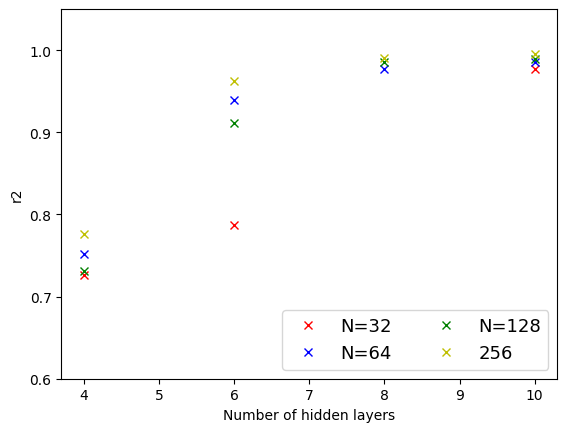

In [21]:
xaxis = [2*i for i in layers]
plt.plot(xaxis, cod_32, 'rx')
plt.plot(xaxis, cod_64, 'bx')
plt.plot(xaxis, cod_128, 'gx')
plt.plot(xaxis, cod_256, 'yx')
plt.ylim([0.6, 1.05])
plt.rcParams.update({'font.size':13})
plt.xlabel('Number of hidden layers')
plt.ylabel(r'r2')
plt.legend(['N=32', 'N=64', 'N=128', '256'], ncol=2, loc='lower right')
plt.savefig('CNN_UUp_hyperparam.png')